# MERKUZONE CLUSTERING: Identifikasi dan Prioritisasi Zonasi Lingkungan untuk Penanganan Polusi

DATA UNDERSTANDING

1.	Provinsi: Nama provinsi di Indonesia.
2.	suhu_rata_rata: Rata-rata suhu udara di provinsi tersebut (dalam derajat Celsius).
3.	JumlahCurahHujan(mm/tahun): Jumlah curah hujan tahunan di provinsi tersebut (dalam milimeter).
4.	JumlahHariHujan(hari): Jumlah hari dalam setahun dengan curah hujan di provinsi tersebut.
5.	PenyinaranMatahari(jam): Jumlah jam penyinaran matahari per hari di provinsi tersebut.
6.	kelembaban: Rata-rata kelembaban udara di provinsi tersebut (dalam persen).
7.	tekanan_udara: Rata-rata tekanan udara di provinsi tersebut (dalam hPa).
8.	kecepatan_angin: Rata-rata kecepatan angin di provinsi tersebut (dalam m/s).
9.	luas_wilayah: Luas total wilayah provinsi tersebut (dalam km persegi).
10.	jumlah_pulau: Jumlah pulau di provinsi tersebut.
11.	luas_kawasan_hutan: Luas total kawasan hutan di provinsi tersebut (dalam km persegi).
12.	IndeksKualitasTutupanLahan: Indeks yang menggambarkan kualitas tutupan lahan di provinsi tersebut.
13.	luas_kebakaran_hutan: Luas total area hutan yang terbakar di provinsi tersebut (dalam km persegi).
14.	indekskualitasudara: Indeks yang menggambarkan kualitas udara di provinsi tersebut.
15.	indikator_ph: Indikator pH air di provinsi tersebut.
16.	indikator_tds: Total padatan terlarut (TDS) dalam air di provinsi tersebut.
17.	indikator_tss: Total padatan tersuspensi (TSS) dalam air di provinsi tersebut.
18.	indikator_suhu: Suhu air di provinsi tersebut.
19.	indikator_do: Kadar oksigen terlarut (DO) dalam air di provinsi tersebut.
20.	indikator_bod: Permintaan oksigen biologis (BOD) dalam air di provinsi tersebut.
21.	indikator_cod: Permintaan oksigen kimia (COD) dalam air di provinsi tersebut.
22.	indikator_no3: Kadar nitrat (NO3) dalam air di provinsi tersebut.
23.	indikator_nh3: Kadar amonia (NH3) dalam air di provinsi tersebut.
24.	indikator_so4: Kadar sulfat (SO4) dalam air di provinsi tersebut.
25.	indikator_FecalColiform: Kadar Fecal Coliform dalam air di provinsi tersebut.
26.	indikator_coliform: Kadar Coliform dalam air di provinsi tersebut.
27.	indeks_kualitas_air: Indeks yang menggambarkan kualitas air di provinsi tersebut.
28.	indeks_kualitas_air_laut: Indeks yang menggambarkan kualitas air laut di provinsi tersebut.
29.	IndeksKualitasLingkunganHidup: Indeks yang menggambarkan kualitas lingkungan hidup di provinsi tersebut.
30.	Limbahyangdihasilkan(manufaktur): Jumlah limbah yang dihasilkan oleh industri manufaktur di provinsi tersebut.
31.	Limbahyangdikelola(manufaktur): Jumlah limbah yang dikelola oleh industri manufaktur di provinsi tersebut.
32.	jumlah_produksi_sampah: Jumlah total sampah yang diproduksi di provinsi tersebut.
33.	akses_sanitasi_layak: Persentase penduduk yang memiliki akses ke fasilitas sanitasi layak di provinsi tersebut.
34.	perlakuan_sampah: Cara perlakuan sampah di provinsi tersebut.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/finpro.csv')
df.head()

Provinsi  suhu_rata_rata  JumlahCurahHujan(mm/tahun)  \
0           Aceh           28.58                      1834.1   
1  SumateraUtara           28.83                      3269.5   
2  SumateraBarat           27.08                      4950.5   
3           Riau           28.62                      3231.1   
4          Jambi           27.15                      3265.6   

   JumlahHariHujan(hari)  PenyinaranMatahari(jam)  kelembaban  tekanan_udara  \
0                  162.0                     5.10       76.48        1004.10   
1                  200.0                     4.50       77.83        1007.15   
2                  223.0                     4.51       81.18         995.44   
3                  168.0                     4.52       76.21        1005.58   
4                  174.0                     4.21       86.33        1007.10   

   kecepatan_angin  luas_wilayah  jumlah_pulau  ...  indikator_FecalColiform  \
0             4.06      56834.75         363.0  ...                      0.0   
1             3.59      72460.74         229.0  ...                    855.0   
2             1.98      42119.54         219.0  ...                   2450.0   
3             0.82      89935.90         144.0  ...                      8.1   
4             1.34      49026.58          14.0  ...                   5700.0   

   indikator_coliform  indeks_kualitas_air  indeks_kualitas_air_laut  \
0                0.00                60.41                     89.20   
1                0.00                61.20                     85.19   
2             7790.00                55.64                     88.32   
3             1763.50                53.88                     83.95   
4             8933.33                49.49                     81.67   

   IndeksKualitasLingkunganHidup  Limbahyangdihasilkan(manufaktur)  \
0                          78.29                           1082.53   
1                          74.11                         192716.52   
2                          74.98                         182303.89   
3                          72.10                          30095.19   
4                          70.32                           2181.46   

   Limbahyangdikelola(manufaktur)  jumlah_produksi_sampah  \
0                          1075.4                  255.81   
1                       190492.66                 1746.00   
2                       182303.56                  643.76   
3                        29165.72                  977.00   
4                         1672.66                  437.50   

   akses_sanitasi_layak  perlakuan_sampah  
0                 77.48             14.22  
1                 82.30             20.95  
2                 69.27             14.37  
3                 84.06             20.75  
4                 79.54             11.02  

[5 rows x 34 columns]

In [ ]:
# Menghapus kolom terakhir yang kelebihan
df.drop(df.index[-1], inplace=True)
df.tail()

Provinsi  suhu_rata_rata  JumlahCurahHujan(mm/tahun)  \
29  SulawesiBarat           27.43                      2395.8   
30         Maluku           28.54                      3766.0   
31    MalukuUtara           27.31                      2913.9   
32     PapuaBarat           27.76                      1549.0   
33          Papua           27.95                      2576.3   

    JumlahHariHujan(hari)  PenyinaranMatahari(jam)  kelembaban  tekanan_udara  \
29                  168.0                     6.00       84.54        1005.91   
30                  244.0                     5.54       82.24        1007.85   
31                  238.0                     5.50       85.14        1005.85   
32                  174.0                     4.69       84.42        1006.08   
33                  207.0                     5.27       84.09        1001.80   

    kecepatan_angin  luas_wilayah  jumlah_pulau  ...  indikator_FecalColiform  \
29             3.04      16594.75          69.0  ...                    17.50   
30             2.09      46158.27        1388.0  ...                 15133.33   
31             4.74      32998.70         901.0  ...                    50.00   
32             1.66      99398.26        4520.0  ...                     1.80   
33             1.31     312816.36         584.0  ...                     0.00   

    indikator_coliform  indeks_kualitas_air  indeks_kualitas_air_laut  \
29                0.00                56.41                     87.92   
30            22733.33                52.08                     89.28   
31                0.00                55.69                     87.83   
32               53.00                62.00                     89.30   
33                0.00                55.07                     87.29   

    IndeksKualitasLingkunganHidup  Limbahyangdihasilkan(manufaktur)  \
29                          76.77                              19.4   
30                          77.69                                 -   
31                          78.84                            282.85   
32                          84.22                             82.85   
33                          81.46                                 -   

    Limbahyangdikelola(manufaktur)  jumlah_produksi_sampah  \
29                            17.8                  140.93   
30                               -                  246.40   
31                          282.85                   46.31   
32                           81.41                  165.63   
33                               -                  253.27   

    akses_sanitasi_layak  perlakuan_sampah  
29                 78.88             10.95  
30                 76.47              6.60  
31                 79.39             24.32  
32                 73.52             12.59  
33                 40.34              9.36  

[5 rows x 34 columns]

Rows terakhir dihapus karena bukan termasuk rows dengan value nama provinsi di Indonesia dan didalamnya NaN kecuali kolom indeks kualitas air. Setelah diselidiki di statistik lingkungan hidup juga kolom tersebut adalah rata-rata saja dari setiap kolom yang ada.

In [ ]:
# Mengubah nama kolom menjadi huruf kecil
df = df.rename(columns=str.lower)

# Menghilangkan underscore pada nama kolom
df.columns = df.columns.str.replace('_', '')
df.head()

provinsi  suhuratarata  jumlahcurahhujan(mm/tahun)  \
0           Aceh         28.58                      1834.1   
1  SumateraUtara         28.83                      3269.5   
2  SumateraBarat         27.08                      4950.5   
3           Riau         28.62                      3231.1   
4          Jambi         27.15                      3265.6   

   jumlahharihujan(hari)  penyinaranmatahari(jam)  kelembaban  tekananudara  \
0                  162.0                     5.10       76.48       1004.10   
1                  200.0                     4.50       77.83       1007.15   
2                  223.0                     4.51       81.18        995.44   
3                  168.0                     4.52       76.21       1005.58   
4                  174.0                     4.21       86.33       1007.10   

   kecepatanangin  luaswilayah  jumlahpulau  ...  indikatorfecalcoliform  \
0            4.06     56834.75        363.0  ...                     0.0   
1            3.59     72460.74        229.0  ...                   855.0   
2            1.98     42119.54        219.0  ...                  2450.0   
3            0.82     89935.90        144.0  ...                     8.1   
4            1.34     49026.58         14.0  ...                  5700.0   

   indikatorcoliform  indekskualitasair  indekskualitasairlaut  \
0               0.00              60.41                  89.20   
1               0.00              61.20                  85.19   
2            7790.00              55.64                  88.32   
3            1763.50              53.88                  83.95   
4            8933.33              49.49                  81.67   

   indekskualitaslingkunganhidup  limbahyangdihasilkan(manufaktur)  \
0                          78.29                           1082.53   
1                          74.11                         192716.52   
2                          74.98                         182303.89   
3                          72.10                          30095.19   
4                          70.32                           2181.46   

   limbahyangdikelola(manufaktur)  jumlahproduksisampah  aksessanitasilayak  \
0                          1075.4                255.81               77.48   
1                       190492.66               1746.00               82.30   
2                       182303.56                643.76               69.27   
3                        29165.72                977.00               84.06   
4                         1672.66                437.50               79.54   

   perlakuansampah  
0            14.22  
1            20.95  
2            14.37  
3            20.75  
4            11.02  

[5 rows x 34 columns]

Menyesuaikan nama variabel menjadi huruf kecil semua agar dataset lebih tertata

In [ ]:
# Menampilkan informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   provinsi                          34 non-null     object 
 1   suhuratarata                      34 non-null     float64
 2   jumlahcurahhujan(mm/tahun)        34 non-null     float64
 3   jumlahharihujan(hari)             34 non-null     float64
 4   penyinaranmatahari(jam)           34 non-null     float64
 5   kelembaban                        34 non-null     float64
 6   tekananudara                      34 non-null     float64
 7   kecepatanangin                    34 non-null     float64
 8   luaswilayah                       34 non-null     float64
 9   jumlahpulau                       34 non-null     float64
 10  luaskawasanhutan                  34 non-null     float64
 11  indekskualitastutupanlahan        34 non-null     float64
 12  luaskebaka

In [ ]:
# Mengecek jumlah data yang hilang per kolom
missing_data = df.isnull().sum()
missing_data

provinsi                            0
suhuratarata                        0
jumlahcurahhujan(mm/tahun)          0
jumlahharihujan(hari)               0
penyinaranmatahari(jam)             0
kelembaban                          0
tekananudara                        0
kecepatanangin                      0
luaswilayah                         0
jumlahpulau                         0
luaskawasanhutan                    0
indekskualitastutupanlahan          0
luaskebakaranhutan                  0
indekskualitasudara                 0
indikatorph                         0
indikatortds                        0
indikatortss                        0
indikatorsuhu                       0
indikatordo                         0
indikatorbod                        0
indikatorcod                        0
indikatorno3                        0
indikatornh3                        0
indikatorso4                        0
indikatorfecalcoliform              0
indikatorcoliform                   0
indekskualit

In [ ]:
# Ubah type data Limbah
df['limbahyangdihasilkan(manufaktur)'] = pd.to_numeric(df['limbahyangdihasilkan(manufaktur)'], errors='coerce')
df['limbahyangdikelola(manufaktur)'] = pd.to_numeric(df['limbahyangdikelola(manufaktur)'], errors='coerce')

# Mengubah nilai NaN menjadi 0
df['limbahyangdihasilkan(manufaktur)'] = df['limbahyangdihasilkan(manufaktur)'].fillna(0)
df['limbahyangdikelola(manufaktur)'] = df['limbahyangdikelola(manufaktur)'].fillna(0)

# Memilih kolom untuk digabungkan
columns_to_concat = ['suhuratarata', 'jumlahcurahhujan(mm/tahun)', 'jumlahharihujan(hari)', 'penyinaranmatahari(jam)', 'kelembaban', 'tekananudara',
                     'kecepatanangin', 'luaswilayah', 'jumlahpulau', 'luaskawasanhutan', 'indekskualitastutupanlahan', 'luaskebakaranhutan',
                     'indekskualitasudara', 'indikatorph', 'indikatortds','indikatortss', 'indikatorsuhu', 'indikatordo', 'indikatorbod',
                     'indikatorcod', 'indikatorno3', 'indikatornh3', 'indikatorso4', 'indikatorfecalcoliform',
                     'indikatorcoliform', 'indekskualitasair', 'indekskualitasairlaut', 'indekskualitaslingkunganhidup',
                     'jumlahproduksisampah', 'aksessanitasilayak', 'perlakuansampah']

# Menggabungkan kedua DataFrame
df_combined = pd.concat([df[columns_to_concat], df[['limbahyangdihasilkan(manufaktur)', 'limbahyangdikelola(manufaktur)']]], axis=1)
df_combined

suhuratarata  jumlahcurahhujan(mm/tahun)  jumlahharihujan(hari)  \
0          28.58                      1834.1                  162.0   
1          28.83                      3269.5                  200.0   
2          27.08                      4950.5                  223.0   
3          28.62                      3231.1                  168.0   
4          27.15                      3265.6                  174.0   
5          29.41                      3250.2                  219.0   
6          28.42                      4518.5                  201.0   
7          28.52                      2099.1                  162.0   
8          28.08                      3026.7                  234.0   
9          27.53                      2590.6                  204.0   
10         28.47                      2136.3                  158.0   
11         26.14                      3505.4                  239.0   
12         29.13                      2643.9                  188.0   
13         27.46                      3161.2                  214.0   
14         24.99                      3059.7                  211.0   
15         29.15                      2877.2                  201.0   
16         27.99                      2834.4                  200.0   
17         28.59                      2649.9                  168.0   
18         29.35                      2183.0                  127.0   
19         28.66                      3040.6                  200.0   
20         27.13                      3259.1                  240.0   
21         28.28                      2738.1                  206.0   
22         27.45                      3313.7                  224.0   
23         27.34                      2065.3                  207.0   
24         27.98                      3529.8                  256.0   
25         27.19                       879.4                  175.0   
26         28.38                      4650.9                  209.0   
27         28.54                      2695.4                  222.0   
28         28.71                      2082.8                  202.0   
29         27.43                      2395.8                  168.0   
30         28.54                      3766.0                  244.0   
31         27.31                      2913.9                  238.0   
32         27.76                      1549.0                  174.0   
33         27.95                      2576.3                  207.0   

    penyinaranmatahari(jam)  kelembaban  tekananudara  kecepatanangin  \
0                      5.10       76.48       1004.10            4.06   
1                      4.50       77.83       1007.15            3.59   
2                      4.51       81.18        995.44            1.98   
3                      4.52       76.21       1005.58            0.82   
4                      4.21       86.33       1007.10            1.34   
5                      4.07       81.17       1008.11            2.55   
6                      5.95       77.11       1007.98            4.66   
7                      4.86       77.61       1000.86            1.79   
8                      3.74       83.30       1007.41            3.11   
9                      4.51       83.58       1006.28            4.72   
10                     3.85       77.21       1008.83            2.36   
11                     4.92       84.75        989.57            1.77   
12                     6.02       76.29       1008.56            4.04   
13                     4.55       78.19        989.02            3.43   
14                     5.50       78.34        944.59            3.35   
15                     4.21       78.22       1005.81            2.73   
16                     5.92       81.14       1006.90            3.72   
17                     6.60       77.96       1003.33            3.77   
18                     7.79       73.66       1006.37            3.43   
19                     4.93       79.72       1008.71     

- Penggabungan variabel 'limbahyangdihasilkan(manufaktur)' dan 'limbahyangdikelola(manufaktur)' bertujuan untuk mengganti isi data variabel tersebut dengan data baru yang telah diubah tipe datanya.

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   suhuratarata                      34 non-null     float64
 1   jumlahcurahhujan(mm/tahun)        34 non-null     float64
 2   jumlahharihujan(hari)             34 non-null     float64
 3   penyinaranmatahari(jam)           34 non-null     float64
 4   kelembaban                        34 non-null     float64
 5   tekananudara                      34 non-null     float64
 6   kecepatanangin                    34 non-null     float64
 7   luaswilayah                       34 non-null     float64
 8   jumlahpulau                       34 non-null     float64
 9   luaskawasanhutan                  34 non-null     float64
 10  indekskualitastutupanlahan        34 non-null     float64
 11  luaskebakaranhutan                34 non-null     float64
 12  indekskual

In [ ]:
# Melakukan analisis statistik deskriptif
descriptive_stats = df_combined.describe()
descriptive_stats

suhuratarata  jumlahcurahhujan(mm/tahun)  jumlahharihujan(hari)  \
count     34.000000                   34.000000              34.000000   
mean      28.004118                 2898.323529             200.735294   
std        0.924430                  837.353384              29.363251   
min       24.990000                  879.400000             127.000000   
25%       27.435000                 2440.925000             174.250000   
50%       28.180000                 2895.550000             203.000000   
75%       28.587500                 3263.975000             221.250000   
max       29.410000                 4950.500000             256.000000   

       penyinaranmatahari(jam)  kelembaban  tekananudara  kecepatanangin  \
count                34.000000   34.000000     34.000000       34.000000   
mean                  4.989118   80.395588   1002.760294        2.864412   
std                   0.852260    3.247040     11.385337        1.084263   
min                   3.740000   73.660000    944.590000        0.820000   
25%                   4.387500   77.862500   1003.352500        1.845000   
50%                   4.835000   79.920000   1005.995000        2.905000   
75%                   5.500000   83.510000   1007.557500        3.687500   
max                   7.790000   86.330000   1008.830000        4.740000   

         luaswilayah  jumlahpulau  luaskawasanhutan  ...  \
count      34.000000    34.000000         34.000000  ...   
mean    55659.120294   499.852941       2803.979412  ...   
std     59970.141567   848.993526       4612.187055  ...   
min       660.980000     9.000000          1.100000  ...   
25%     17436.570000    73.500000        655.350000  ...   
50%     39627.295000   224.000000       1404.200000  ...   
75%     67977.315000   510.750000       2953.650000  ...   
max    312816.360000  4520.000000      25241.300000  ...   

       indikatorfecalcoliform  indikatorcoliform  indekskualitasair  \
count            3.400000e+01       3.400000e+01          34.000000   
mean             1.596079e+05       3.911233e+05          53.715588   
std              8.297600e+05       1.941187e+06           5.463372   
min              0.000000e+00       0.000000e+00          39.310000   
25%              1.345000e+01       0.000000e+00          52.215000   
50%              2.437500e+02       1.672500e+02          55.280000   
75%              4.189378e+03       6.599000e+03          56.765000   
max              4.842500e+06       1.126500e+07          62.000000   

       indekskualitasairlaut  indekskualitaslingkunganhidup  \
count              34.000000                      34.000000   
mean               84.823529                      73.074706   
std                 4.782447                       5.798763   
min                63.300000                      54.650000   
25%                83.665000                      70.625000   
50%                85.505000                      72.930000   
75%                87.897500                      76.852500   
max                89.480000                      84.220000   

       jumlahproduksisampah  aksessanitasilayak  perlakuansampah  \
count             34.000000           34.000000        34.000000   
mean             753.182059           80.997059        23.099412   
std             1014.539451            9.784912        16.301708   
min                8.520000           40.340000         4.170000   
25%              205.137500           77.427500        12.997500   
50%              370.315000           81.675000        19.465000   
75%              996.147500           84.932500        29.172500   
max             5600.880000           96.210000        90.240000   

       limbahyangdihasilkan(manufaktur)  limbahyangdikelola(manufaktur)  
count                      3.400000e+01                    3.400000e+01  
mean                       1.137173e+06                    1.100971e+06  
std                        5.119911e+06                    5.023611e+06

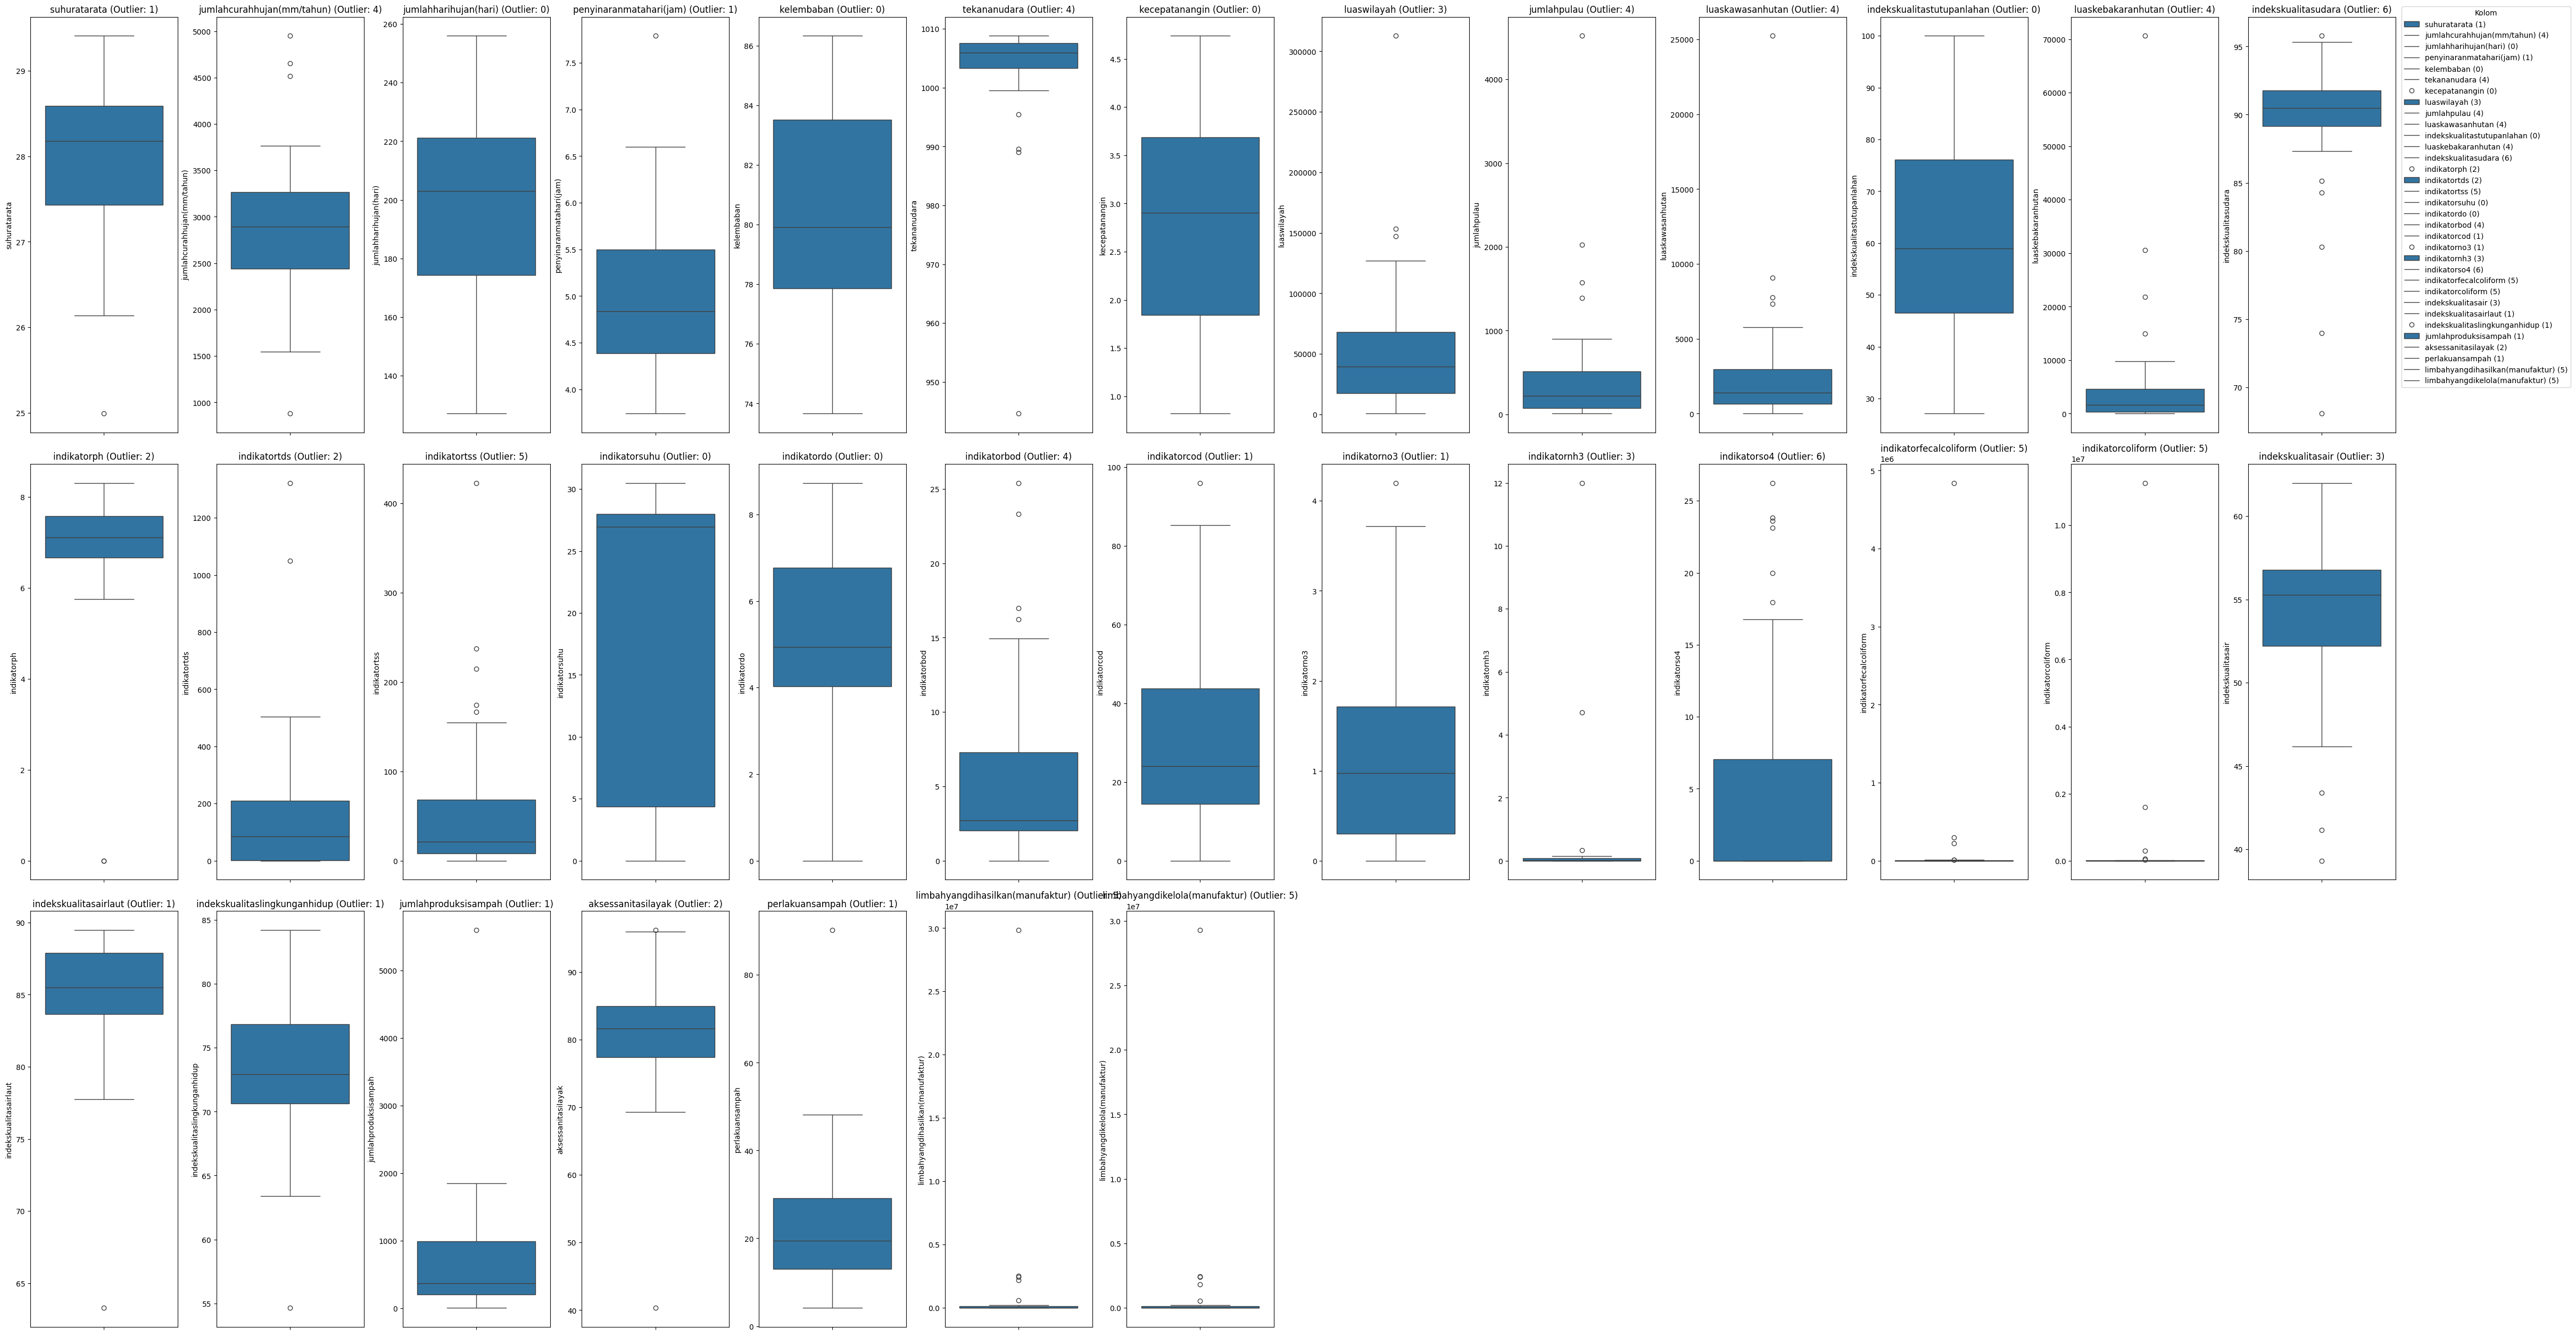

In [ ]:
features = df_combined.columns

# Mengatur ukuran visualisasi
plt.figure(figsize=(45, 25), layout='constrained')

# Menginisialisasi variabel untuk menampung total outlier
total_outliers = []

for i in range(0, len(features)):
    # Membuat subplot untuk setiap kolom
    plt.subplot(3, 13, i + 1)

    # Menggambar boxplot
    sns.boxplot(y=df_combined[features[i]], orient='v')

    # Mendeteksi outlier
    iqr = df_combined[features[i]].quantile(0.75) - df_combined[features[i]].quantile(0.25)
    lower_bound = df_combined[features[i]].quantile(0.25) - 1.5 * iqr
    upper_bound = df_combined[features[i]].quantile(0.75) + 1.5 * iqr
    outliers = df_combined[features[i]][(df_combined[features[i]] < lower_bound) | (df_combined[features[i]] > upper_bound)]

    # Menghitung jumlah outlier
    total_outliers.append(len(outliers))

    # Menambahkan legend
    plt.title(features[i] + f" (Outlier: {len(outliers)})")

# Menambahkan legend secara keseluruhan
plt.subplots_adjust(top=0.93)
plt.figlegend(
    title="Kolom",
    labels=[f"{feature} ({outlier_count})" for feature, outlier_count in zip(features, total_outliers)],
    loc="upper left",
    bbox_to_anchor=(1, 1),
)

# Menampilkan plot
plt.show()

variabel yang tidak memiliki outlier :

JumlahHariHujan(hari), kelembapan, kecepatan_angin, IndeksKualitasTutupanLahan, indikator_suhu, indikator_do

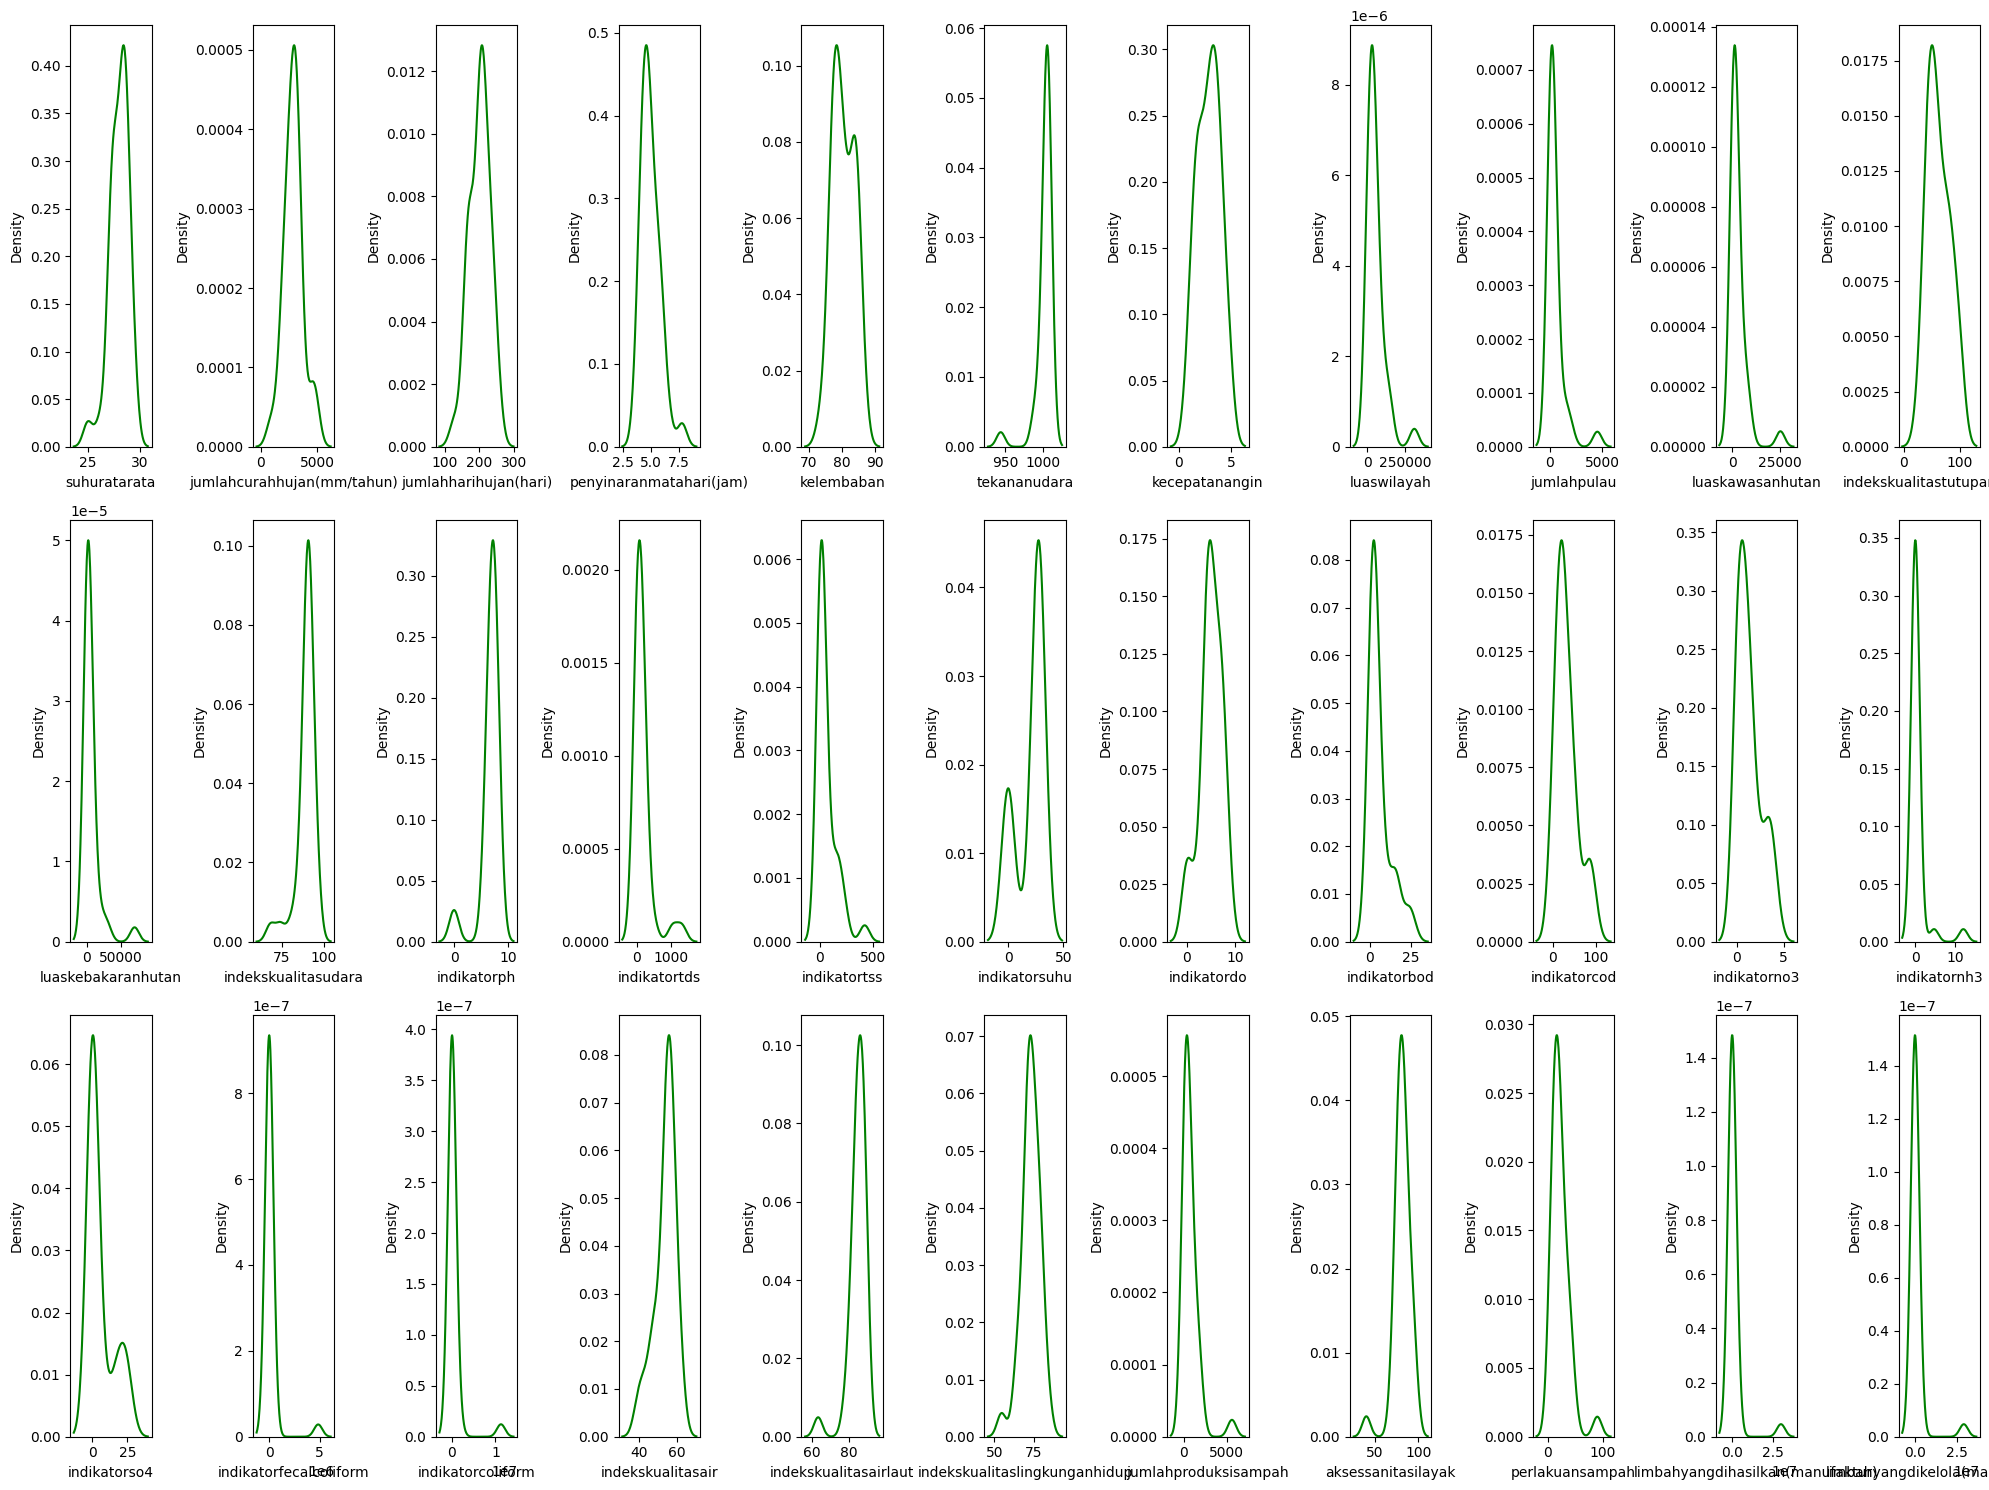

In [ ]:
# Melihat distribusi sebaran data
max_plots = 3 * 11
plt.figure(figsize=(20, 15))
# Loop melalui fitur, batasi ke max_plots
for i in range(min(len(df_combined.columns), max_plots)):
    feature = df_combined.columns[i]
    plt.subplot(3, 11, i+1)
    sns.kdeplot(x=df[feature], color='green')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung korelasi
correlation_matrix = df_combined.corr()

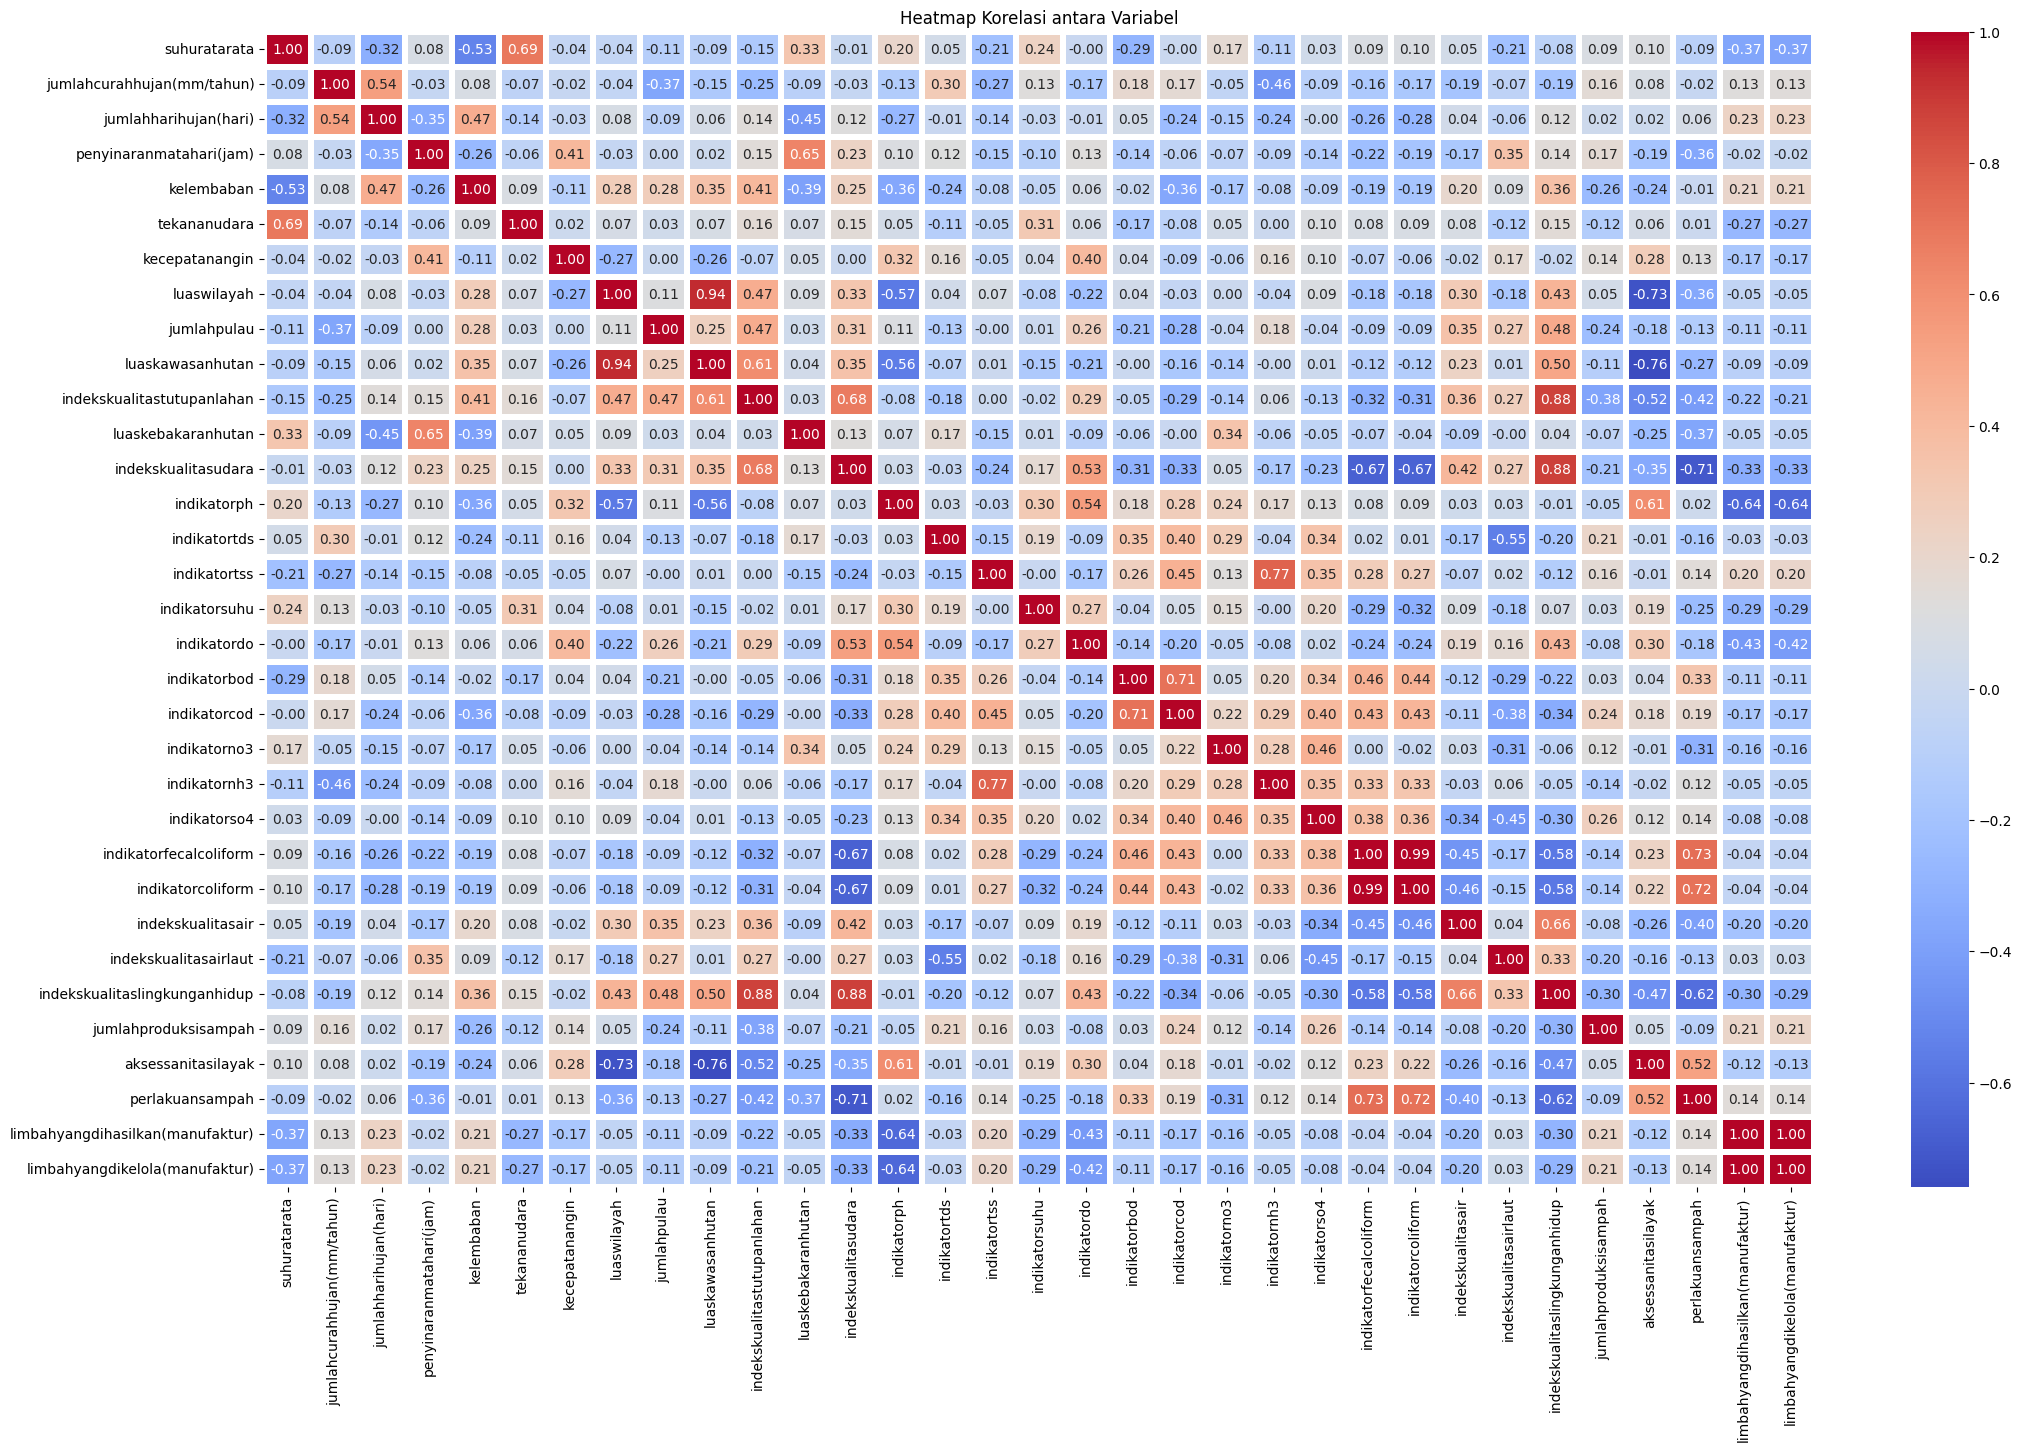

In [ ]:
# Membuat heatmap korelasi antara variabel
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=4)
plt.title("Heatmap Korelasi antara Variabel")
plt.show()


Korelasi antar variabel lebih dari 0.5 - 0.99

Index kualitas lingkungan hidup X luas kawasan hutan = 0.50

Akses sanitasi layak X perlakuan sampah = 0.52

Indikator do X index kualitas udara = 0.53

Jumlah hari hujan X jumlah curah hujan = 0.54

Indikator do X indikator ph = 0.54

Index kualitas tutupan lahan X luas kawasan hutan = 0.61

Akses sanitasi layak X indikator ph = 0.61

Luas kebakaran hutan X penyinaran matahari = 0.65

Index kualitas air X index kualitas lingkungan hidup = 0.66

Index kualitas udara X index kualitas tutupan lahan = 0.68

Suhu rata-rata X tekanan udara = 0.69

Indikator bod X indikator cod = 0.71

Indikator coliform X perlakuan sampah = 0.72

Indikator fecalcoliform X perlakuan sampah = 0.73

Indikator nh3 X indikator tts = 0.77

Index kualitas tutupan lahan X index kualitas lingkungan hidup = 0.88

Index kualitas udara X index kualitas lingkungan hidup = 0.88

Luas wilayah X luas kawasan hutan = 0.94





EDA

In [ ]:
#Menggabungkan df[Provinsi] dengan df_combined yang telah dilakukan cleaning data
provinsi = df['provinsi']
df_combined_full = pd.concat([provinsi, df_combined], axis=1)

#Melihat hasil gabungan
df_combined_full.head()

provinsi  suhuratarata  jumlahcurahhujan(mm/tahun)  \
0           Aceh         28.58                      1834.1   
1  SumateraUtara         28.83                      3269.5   
2  SumateraBarat         27.08                      4950.5   
3           Riau         28.62                      3231.1   
4          Jambi         27.15                      3265.6   

   jumlahharihujan(hari)  penyinaranmatahari(jam)  kelembaban  tekananudara  \
0                  162.0                     5.10       76.48       1004.10   
1                  200.0                     4.50       77.83       1007.15   
2                  223.0                     4.51       81.18        995.44   
3                  168.0                     4.52       76.21       1005.58   
4                  174.0                     4.21       86.33       1007.10   

   kecepatanangin  luaswilayah  jumlahpulau  ...  indikatorfecalcoliform  \
0            4.06     56834.75        363.0  ...                     0.0   
1            3.59     72460.74        229.0  ...                   855.0   
2            1.98     42119.54        219.0  ...                  2450.0   
3            0.82     89935.90        144.0  ...                     8.1   
4            1.34     49026.58         14.0  ...                  5700.0   

   indikatorcoliform  indekskualitasair  indekskualitasairlaut  \
0               0.00              60.41                  89.20   
1               0.00              61.20                  85.19   
2            7790.00              55.64                  88.32   
3            1763.50              53.88                  83.95   
4            8933.33              49.49                  81.67   

   indekskualitaslingkunganhidup  jumlahproduksisampah  aksessanitasilayak  \
0                          78.29                255.81               77.48   
1                          74.11               1746.00               82.30   
2                          74.98                643.76               69.27   
3                          72.10                977.00               84.06   
4                          70.32                437.50               79.54   

   perlakuansampah  limbahyangdihasilkan(manufaktur)  \
0            14.22                           1082.53   
1            20.95                         192716.52   
2            14.37                         182303.89   
3            20.75                          30095.19   
4            11.02                           2181.46   

   limbahyangdikelola(manufaktur)  
0                         1075.40  
1                       190492.66  
2                       182303.56  
3                        29165.72  
4                         1672.66  

[5 rows x 34 columns]

Variabel 'provinsi' digabungkan untuk memudahkan analisis secara keseluruhan, sebelumnya variabel 'provinsi' dipisahkan terlebih dahulu karena analisis tidak memungkinkan menggunakan variabel dengan tipe data object.

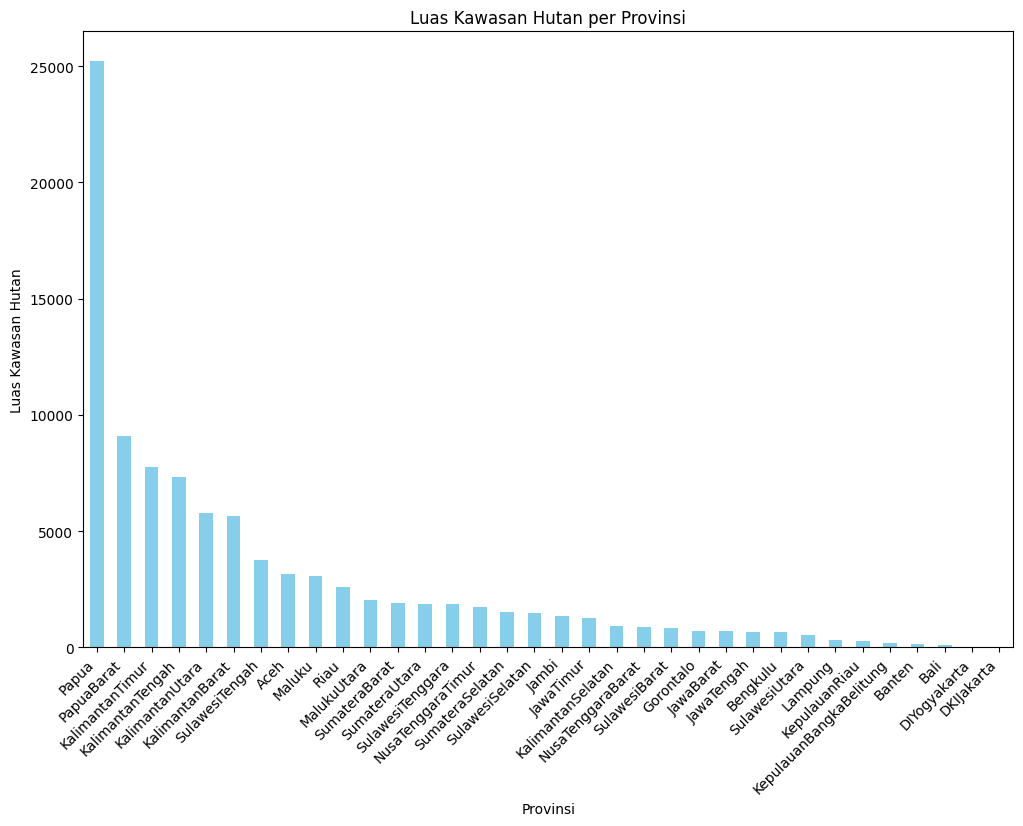

In [ ]:
# Melihat provinsi dengan wilayah terluas
kawasan_terluas_provinsi = df_combined_full.groupby('provinsi')['luaskawasanhutan'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
kawasan_terluas_provinsi.plot(kind='bar', color='skyblue')
plt.title('Luas Kawasan Hutan per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Luas Kawasan Hutan')
plt.xticks(rotation=45, ha='right')
plt.show()

6 provinsi dengan **kawasan hutan terluas** adalah papua, papua barat, kalimantan timur, kalimantan tengah, kalimantan utara, dan kalimantan barat (didominasi oleh wilayah papua dan kalimantan). Dan **kawasan hutan paling sempit** adalah DIY dan DKI Jakarta.

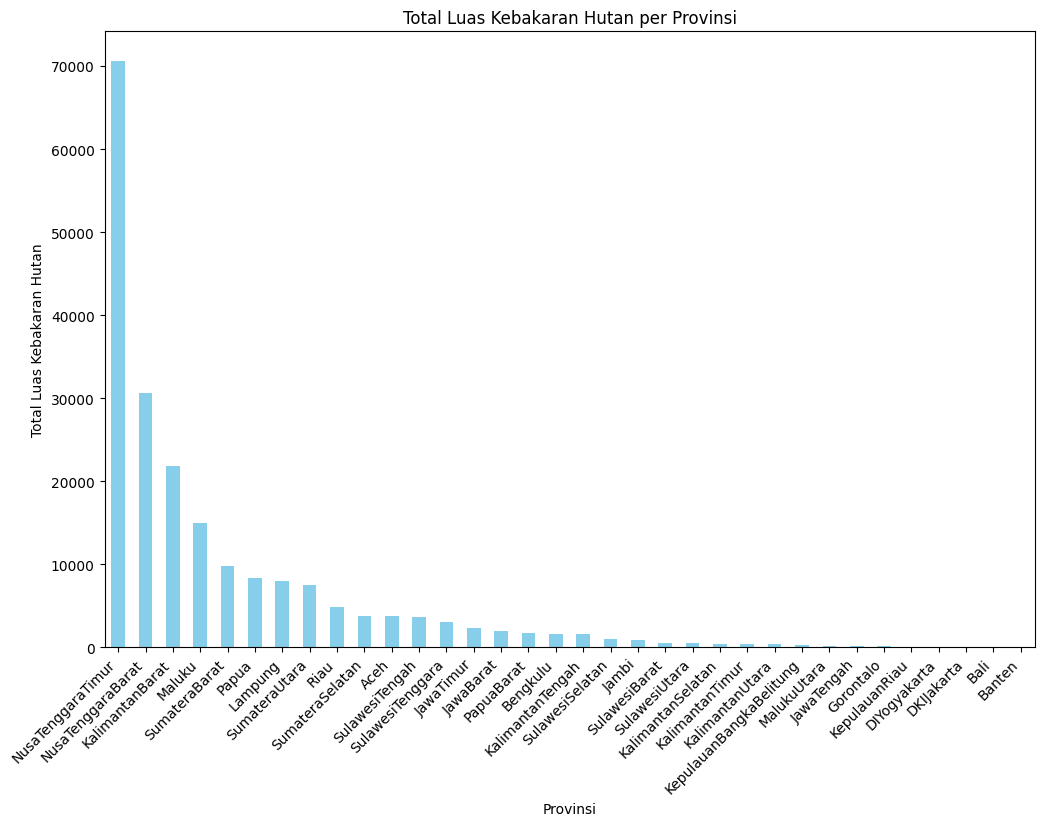

In [ ]:
# Luas kebakaran hutan tiap provinsi
kebakaran_hutan_provinsi = df_combined_full.groupby('provinsi')['luaskebakaranhutan'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
kebakaran_hutan_provinsi.plot(kind='bar', color='skyblue')
plt.title('Total Luas Kebakaran Hutan per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Luas Kebakaran Hutan')
plt.xticks(rotation=45, ha='right')
plt.show()

Sedangkan untuk 6 daerah dengan kebakaran hutan terluas adalah NTT, NTB, Kalimantan barat, Maluku, Sumatera Barat, dan Papua

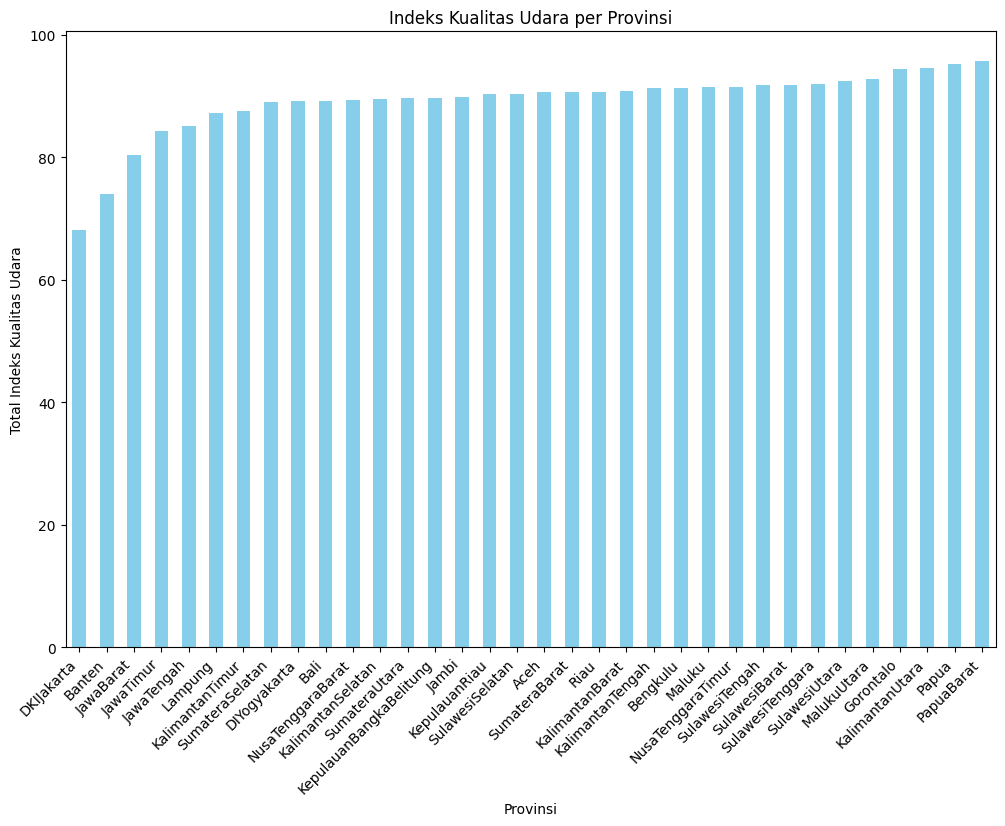

In [ ]:
# Indeks kualitas udara tiap provinsi
indeks_kualitas_udara = df_combined_full.groupby('provinsi')['indekskualitasudara'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
indeks_kualitas_udara.plot(kind='bar', color='skyblue')
plt.title('Indeks Kualitas Udara per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Indeks Kualitas Udara')
plt.xticks(rotation=45, ha='right')
plt.show()


Meskipun terdapat kebakaran hutan yang luas di beberapa provinsi, namun provinsi-provinsi dengan indeks kualitas udara terparah bukan berasal dari provinsi-provinsi tersebut. Hal ini menunjukkan bahwa faktor lain mungkin lebih dominan dalam menentukan kualitas udara (kepadatan penduduk). Namun disisi lain, terdapat provinsi dengan kualitas udara terparah yang mempunyai kawasan lahan sempit yaitu DKI Jakarta dan Banten.

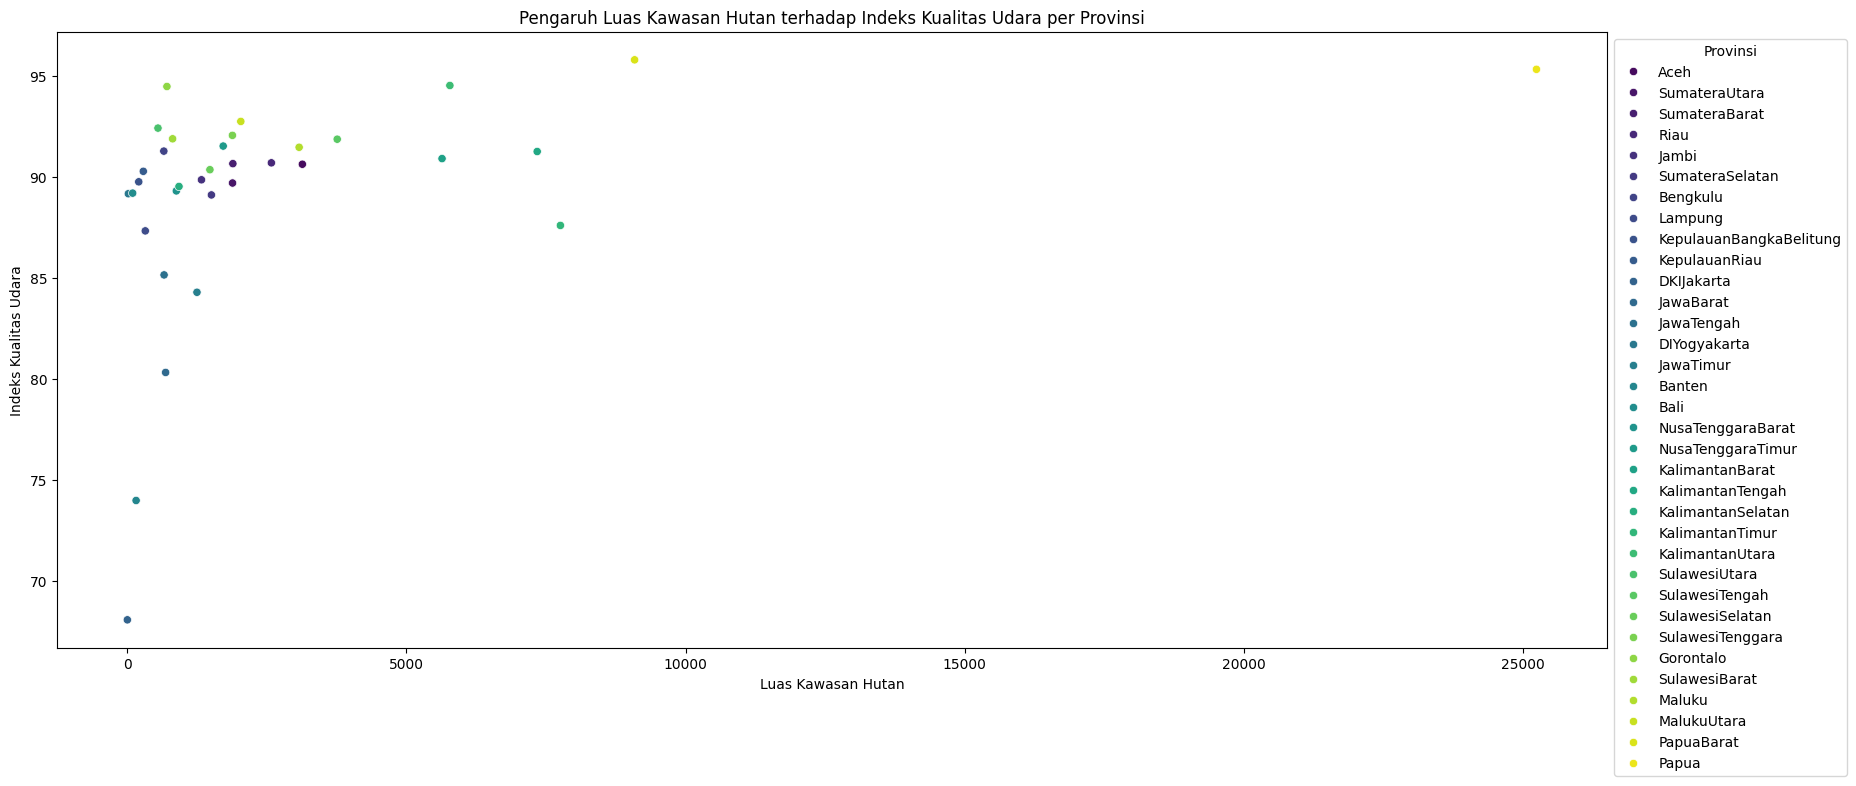

In [ ]:
# Melihat apakah luas kawasan hutan mempengaruhi kualitas udara tiap provinsi
plt.figure(figsize=(20, 8))
sns.scatterplot(x='luaskawasanhutan', y='indekskualitasudara', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh Luas Kawasan Hutan terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('Luas Kawasan Hutan')
plt.ylabel('Indeks Kualitas Udara')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Dari visualisasi tersebut, terlihat bahwa luas kawasan hutan tidak sepenuhnya mempengaruhi kualitas udara. Hal ini dibuktikan dengan beberapa provinsi yang mempunyai luas kawasan hutan rendah hingga sedang juga mempunyai indeks kualitas udara yang tinggi.

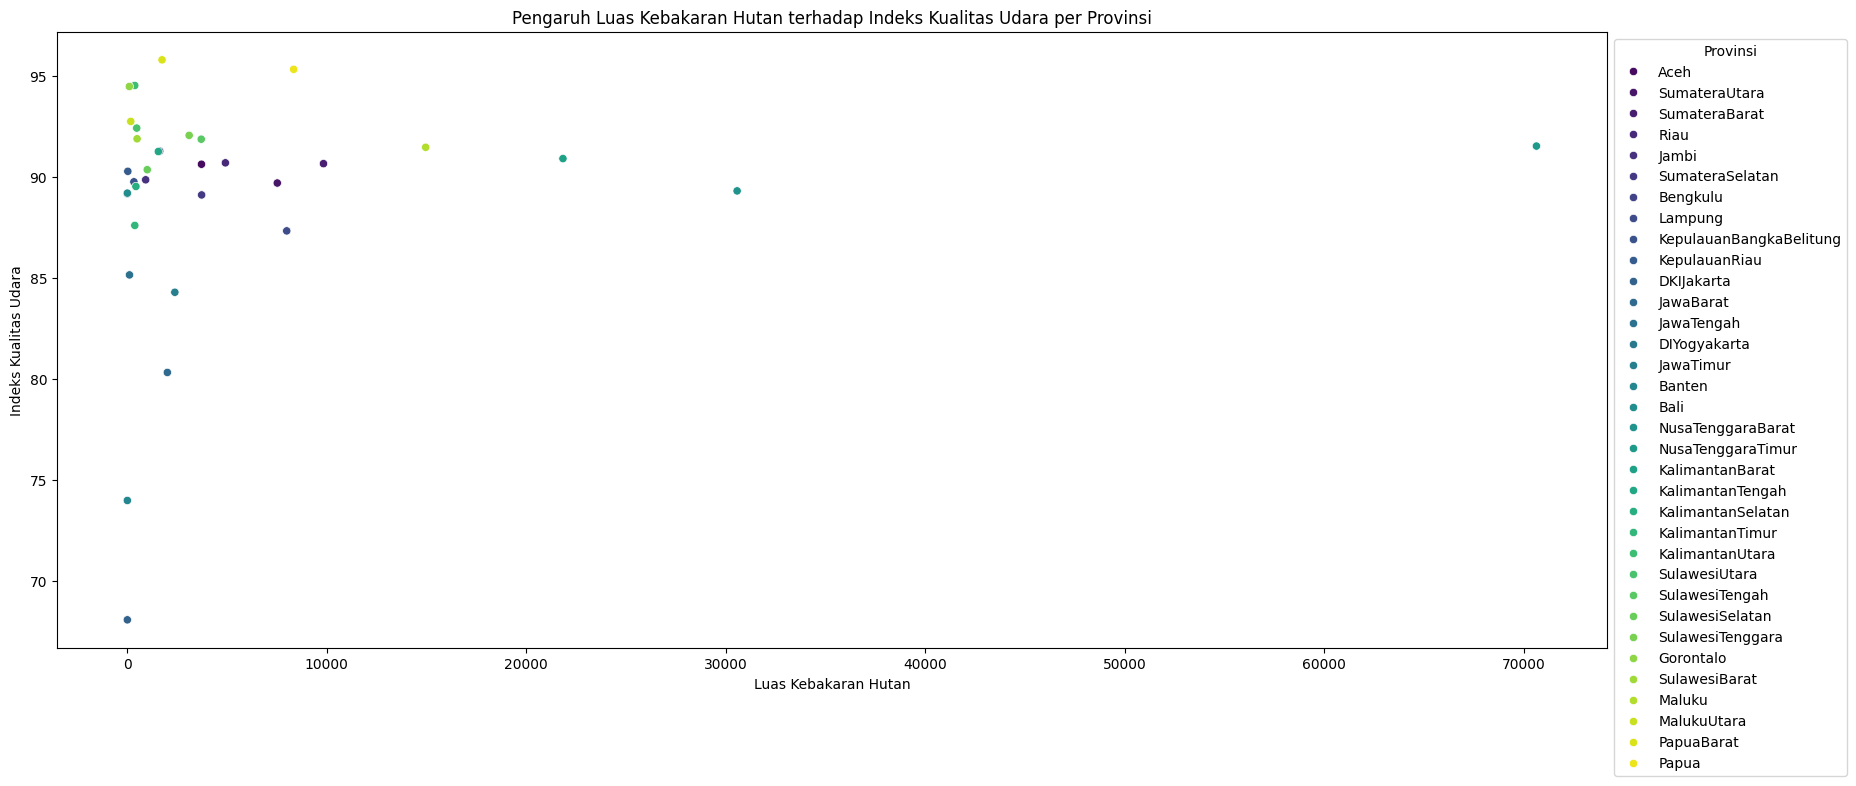

In [ ]:
# Melihat apakah luas kebakaran hutan mempengaruhi kualitas udara tiap provinsi
plt.figure(figsize=(20, 8))
sns.scatterplot(x='luaskebakaranhutan', y='indekskualitasudara', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh Luas Kebakaran Hutan terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('Luas Kebakaran Hutan')
plt.ylabel('Indeks Kualitas Udara')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Dari visualisasi tersebut, terlihat bahwa luas kebakaran hutan mempengaruhi kualitas udara. Hal ini dibuktikan dengan beberapa provinsi yang mempunyai luas kawasan hutan rendah hingga menengah, mempunyai indeks kualitas udara yang tinggi.

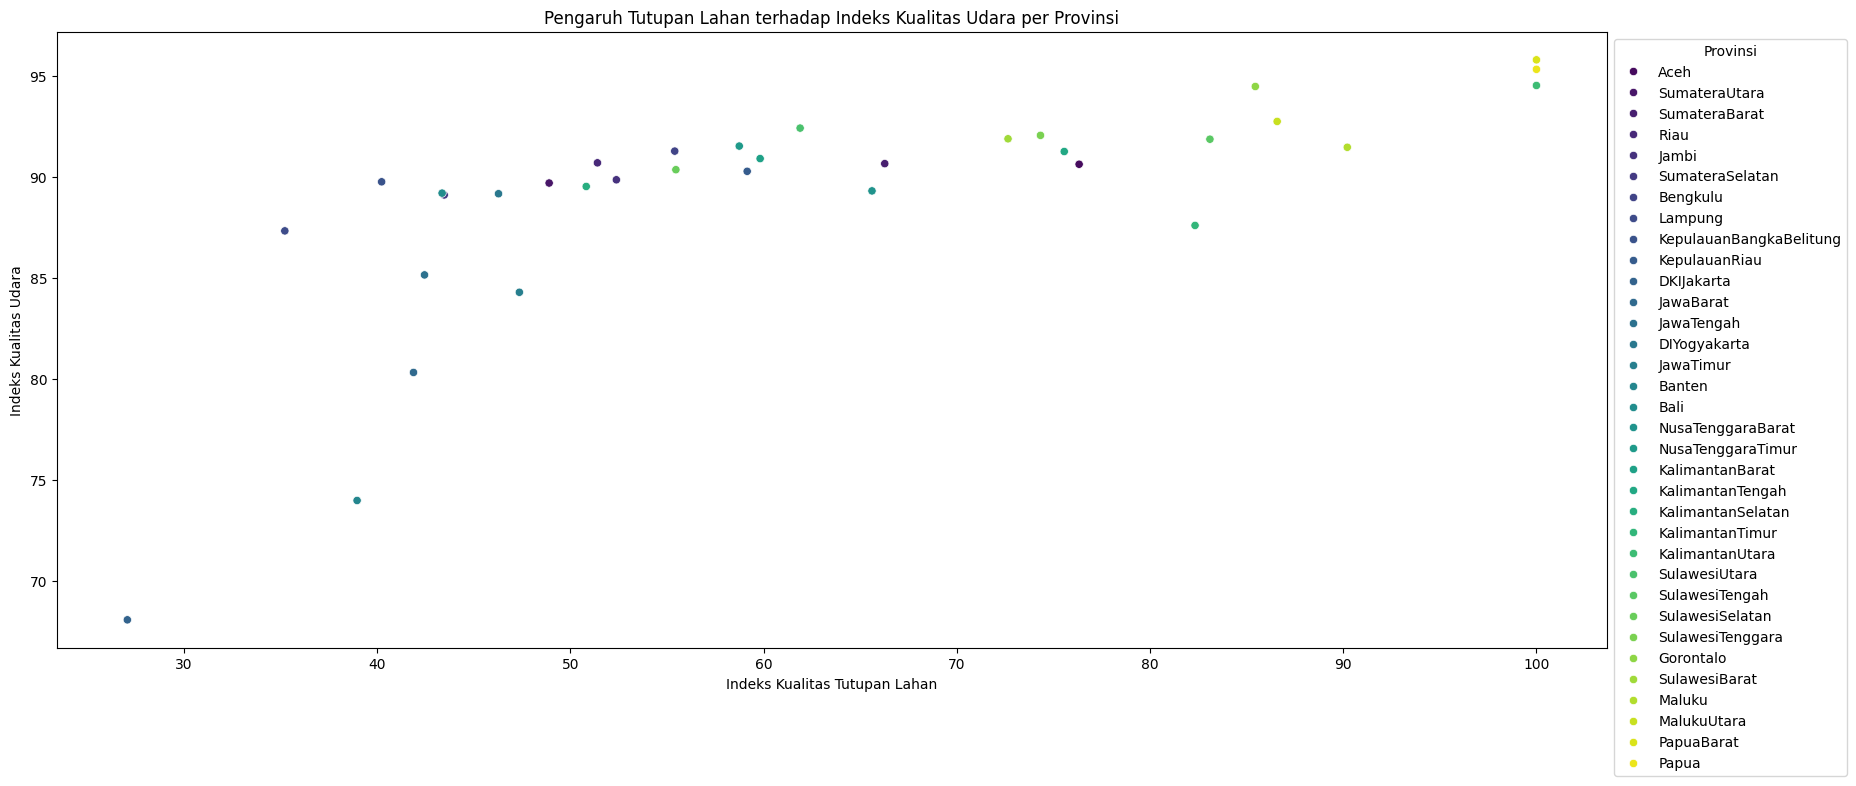

In [ ]:
# Melihat apakah tutupan lahan mempengaruhi kualitas udara tiap provinsi
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitastutupanlahan', y='indekskualitasudara', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh Tutupan Lahan terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('Indeks Kualitas Tutupan Lahan')
plt.ylabel('Indeks Kualitas Udara')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

Dari visualisasi tersebut, terlihat bahwa kualitas lahan tutupan mempengaruhi kualitas udara yang dihasilkan. Hal ini dibuktikan dengan beberapa provinsi yang mempunyai tutupan lahan berkualitas sedang hingga tinggi, mempunyai indeks kualitas udara yang tinggi juga.

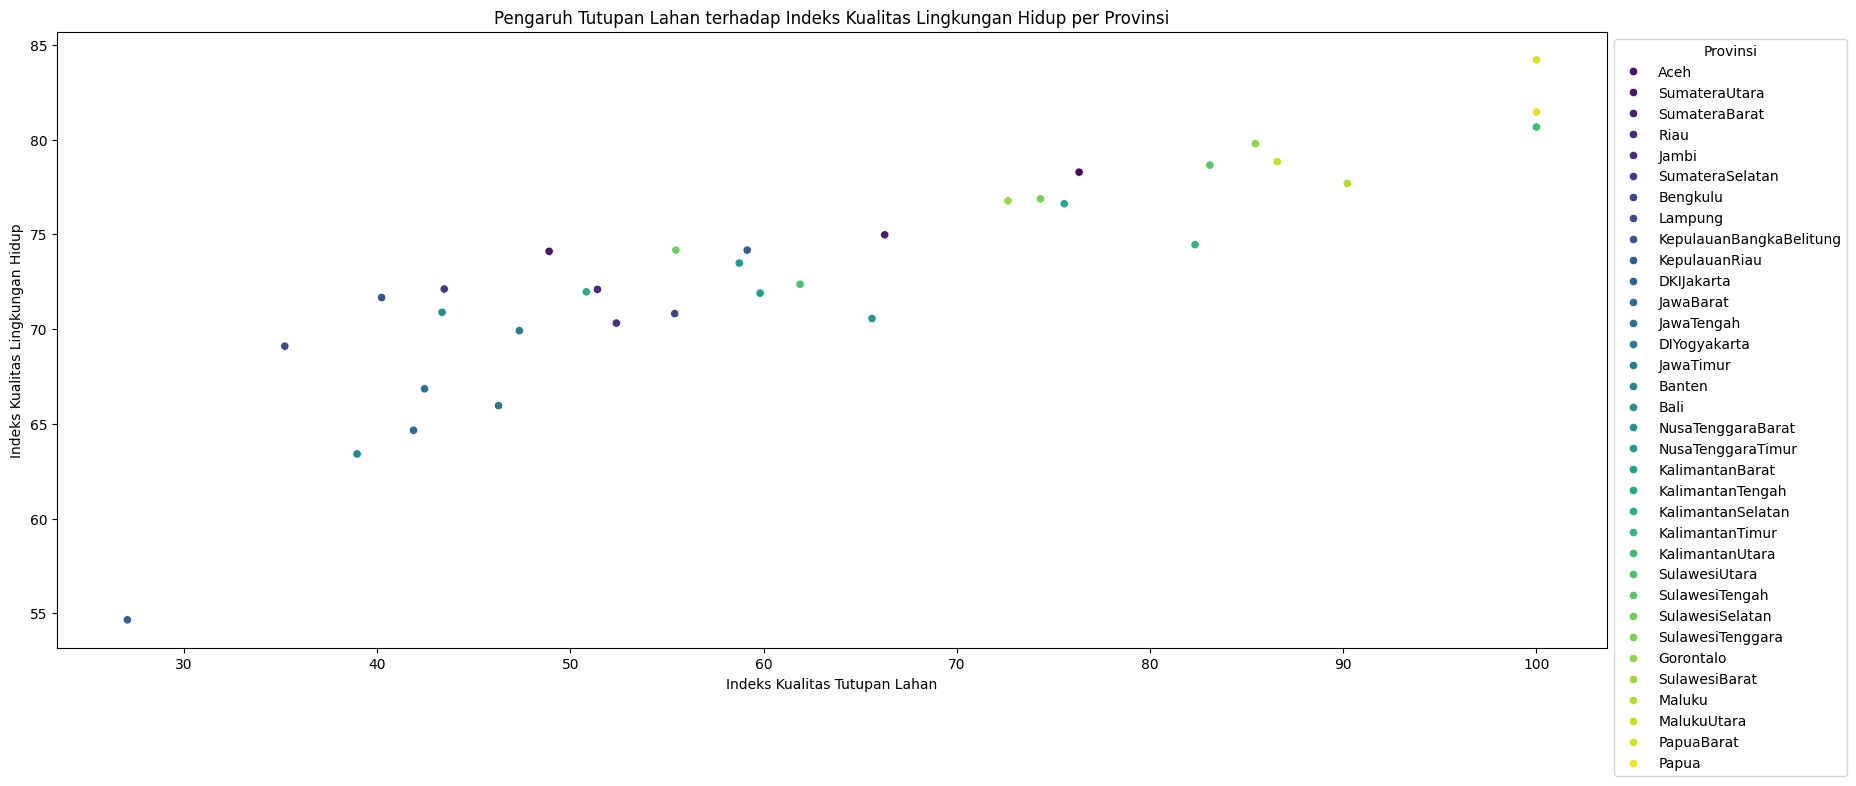

In [ ]:
# Melihat apakah tutupan lahan mempengaruhi kualitas lingkungan hidup tiap provinsi
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitastutupanlahan', y='indekskualitaslingkunganhidup', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh Tutupan Lahan terhadap Indeks Kualitas Lingkungan Hidup per Provinsi')
plt.xlabel('Indeks Kualitas Tutupan Lahan')
plt.ylabel('Indeks Kualitas Lingkungan Hidup')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


Dari visualisasi tersebut, terlihat bahwa kualitas lahan tutupan mempengaruhi kualitas lingkungan hidup yang ada. Hal ini dibuktikan dengan beberapa provinsi apabila indeks kualitas tutupan lahannya baik, maka indek kualitas lingkungan hidupnya akan ikut membaik.

**KESIMPULAN LINGKUNGAN DENGAN KONDISI TERPARAH** (?)
1. Kawasan Hutan dan Kebakaran Hutan: Provinsi Papua dan Kalimantan memiliki kawasan hutan yang luas. Sementara itu, Nusa Tenggara Timur (NTT), Nusa Tenggara Barat (NTB) memiliki kebakaran hutan terluas. Hal ini menunjukkan variasi dalam kondisi hutan di berbagai provinsi di Indonesia.

2. Pengaruh Kebakaran Hutan terhadap Kualitas Udara: Meskipun kebakaran hutan dapat menyebabkan polusi udara, tidak semua provinsi dengan kebakaran hutan terluas memiliki indeks kualitas udara yang rendah. Beberapa provinsi dengan indeks kualitas udara terparah cenderung didominasi oleh provinsi DKI Jakarta, Banten, Jawa Barat, Jawa Timur, dan Jawa Tengah. Ini menunjukkan bahwa faktor-faktor lain, seperti aktivitas manusia dan polusi industri, mungkin memiliki peran yang lebih besar dalam menentukan kualitas udara di provinsi-provinsi tersebut.

3. Pengaruh Luas Kawasan Hutan dan Kualitas Lahan Tutupan terhadap Kualitas Udara: Meskipun luas kawasan hutan dan kualitas lahan tutupan dapat mempengaruhi kualitas udara, tidak ada hubungan yang pasti antara keduanya. Beberapa provinsi dengan luas kawasan hutan yang rendah hingga sedang atau kualitas lahan tutupan yang baik juga memiliki indeks kualitas udara yang tinggi. Hal ini menunjukkan bahwa faktor-faktor lain, seperti polusi udara dari sumber lain, juga dapat berkontribusi terhadap kualitas udara.

Berdasarkan Jenis Pencemaran: cluster berdasarkan jenis pencemaran seperti pencemaran udara, air, tanah.


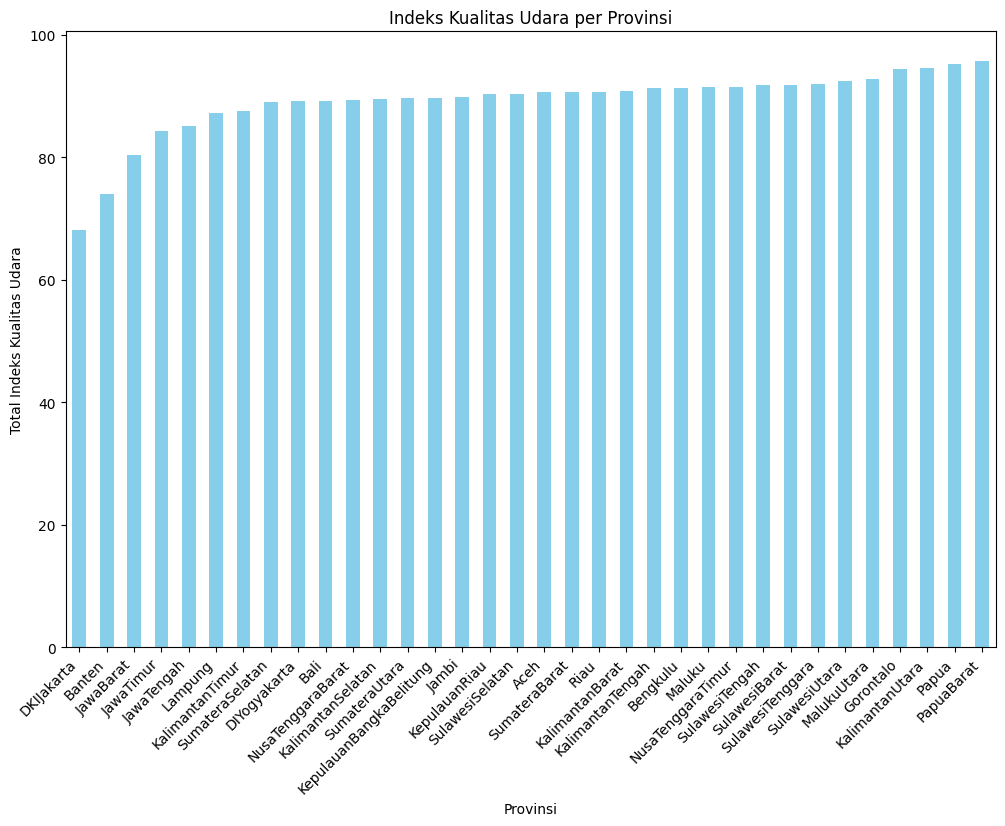

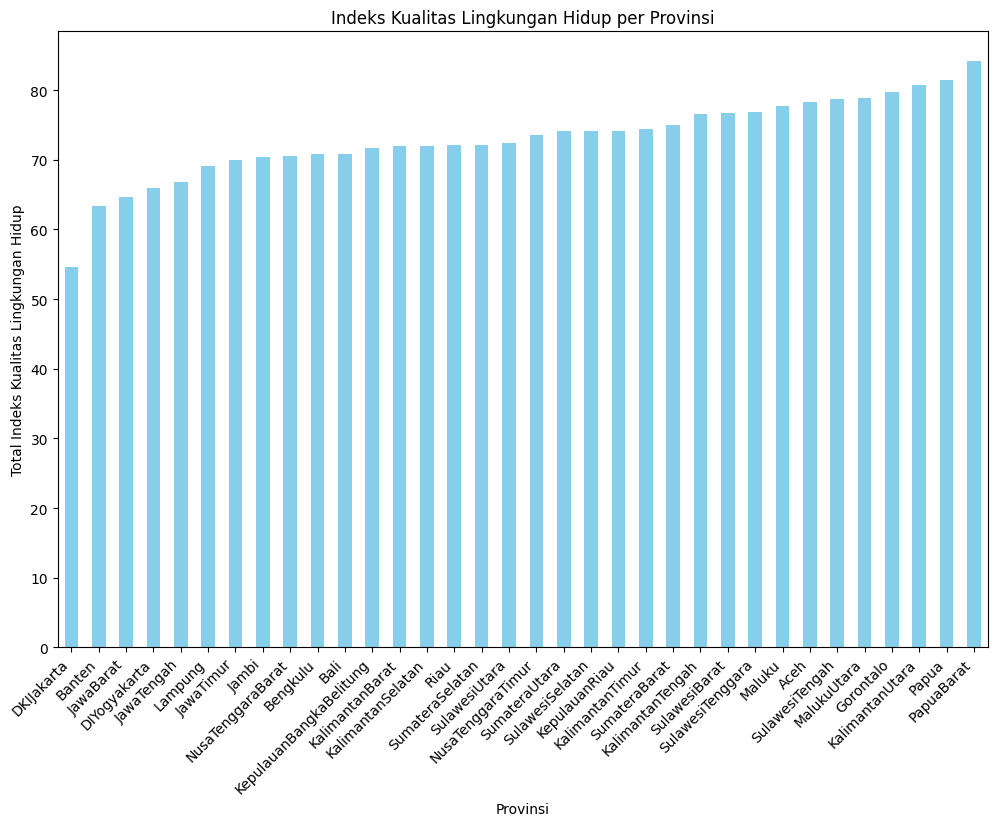

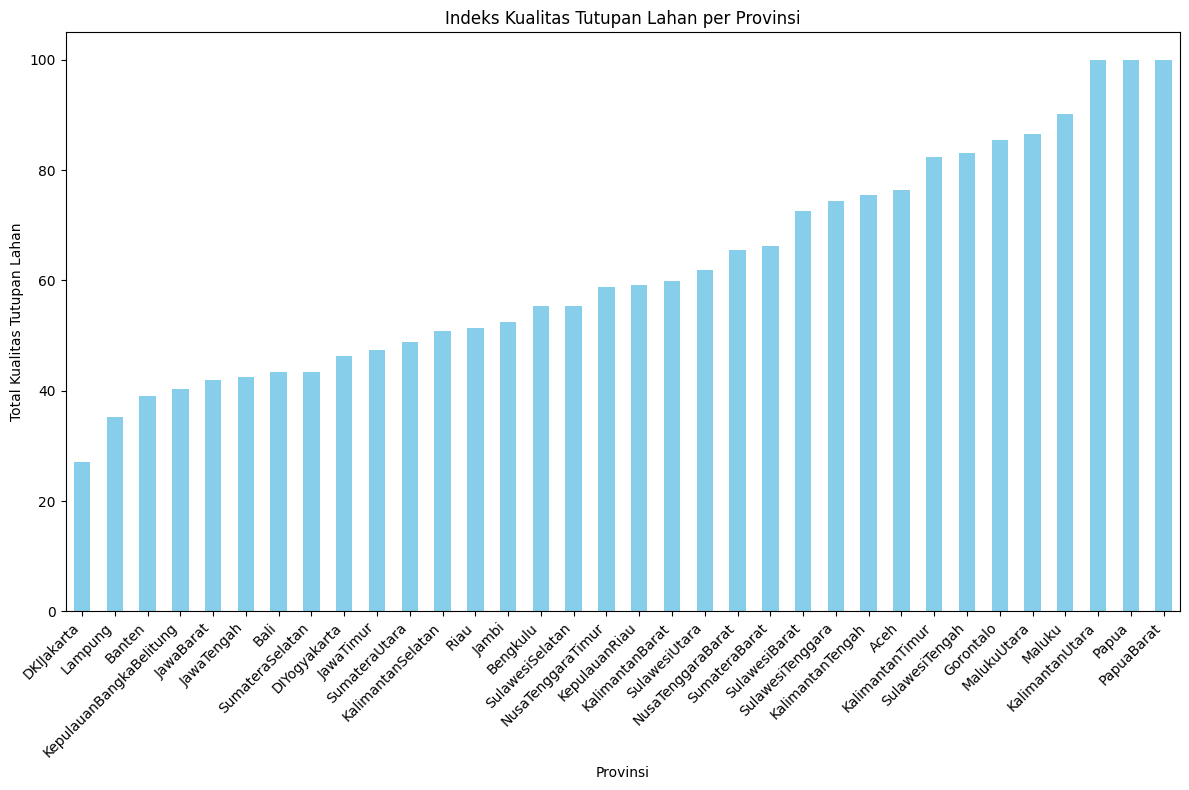

In [ ]:
# Indeks Kualitas Udara
indeks_kualitas_udara = df_combined_full.groupby('provinsi')['indekskualitasudara'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
indeks_kualitas_udara.plot(kind='bar', color='skyblue')
plt.title('Indeks Kualitas Udara per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Indeks Kualitas Udara')
plt.xticks(rotation=45, ha='right')

# Indeks Kualitas Lingkungan Hidup
indeks_kualitas_udara = df_combined_full.groupby('provinsi')['indekskualitaslingkunganhidup'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
indeks_kualitas_udara.plot(kind='bar', color='skyblue')
plt.title('Indeks Kualitas Lingkungan Hidup per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Indeks Kualitas Lingkungan Hidup')
plt.xticks(rotation=45, ha='right')

# Indeks Pencemaran Tanah
indeks_kualitas_udara = df_combined_full.groupby('provinsi')['indekskualitastutupanlahan'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 8))
indeks_kualitas_udara.plot(kind='bar', color='skyblue')
plt.title('Indeks Kualitas Tutupan Lahan per Provinsi')
plt.xlabel('Provinsi')
plt.ylabel('Total Kualitas Tutupan Lahan')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Grafik di atas menunjukan provinsi mana saja yang memiliki indeks kualitas pencemaran air, udara dan tanah yang tinggi dan rendah.
1. Kualitas udara yang tertinggi dimiliki oleh provinsi Papua Barat, sedangkan kualitas udara yang rendah terdapat pada DKI Jakarta
2. Kualitas Air yang tertinggi dimiliki oleh provinsi Papua Barat, sedangkan kualitas air yang rendah terdapat pada DI Yogyakarta
3. Kualitas Tutupan Lahan yang tertinggi dimiliki oleh Kalimantan Utara dan Papua Barat, sedangkan kualitas tutupan lahan yang rendah pada DKI Jakarta.

dapat disimpulkan bahwa kualitas udara, air dan tanah yang tertinggi mayoritas terdapat pada Papua Barat. Sedangkan, indeks kualitas yang terendah terdapat pada DKI Jakarta dan DI Yogyakarta. Hal ini dapat dianalisis lebih lanjut pencemaran udara, air dan tanah apakah dipengaruhi dengan indikator lain.

PENCEMARAN UDARA

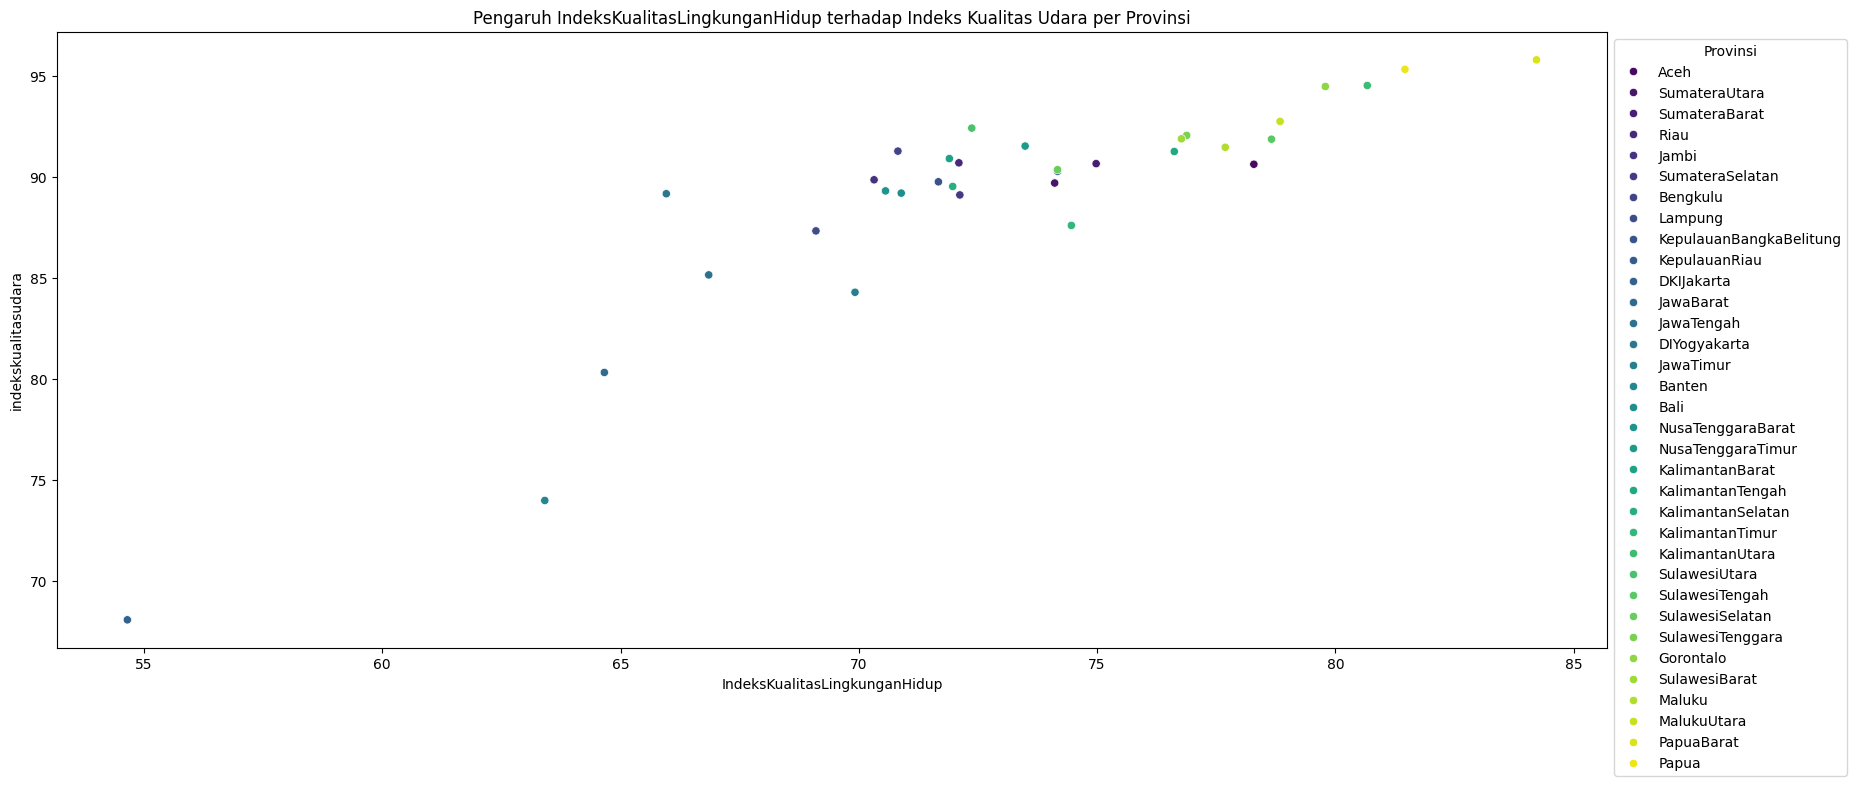

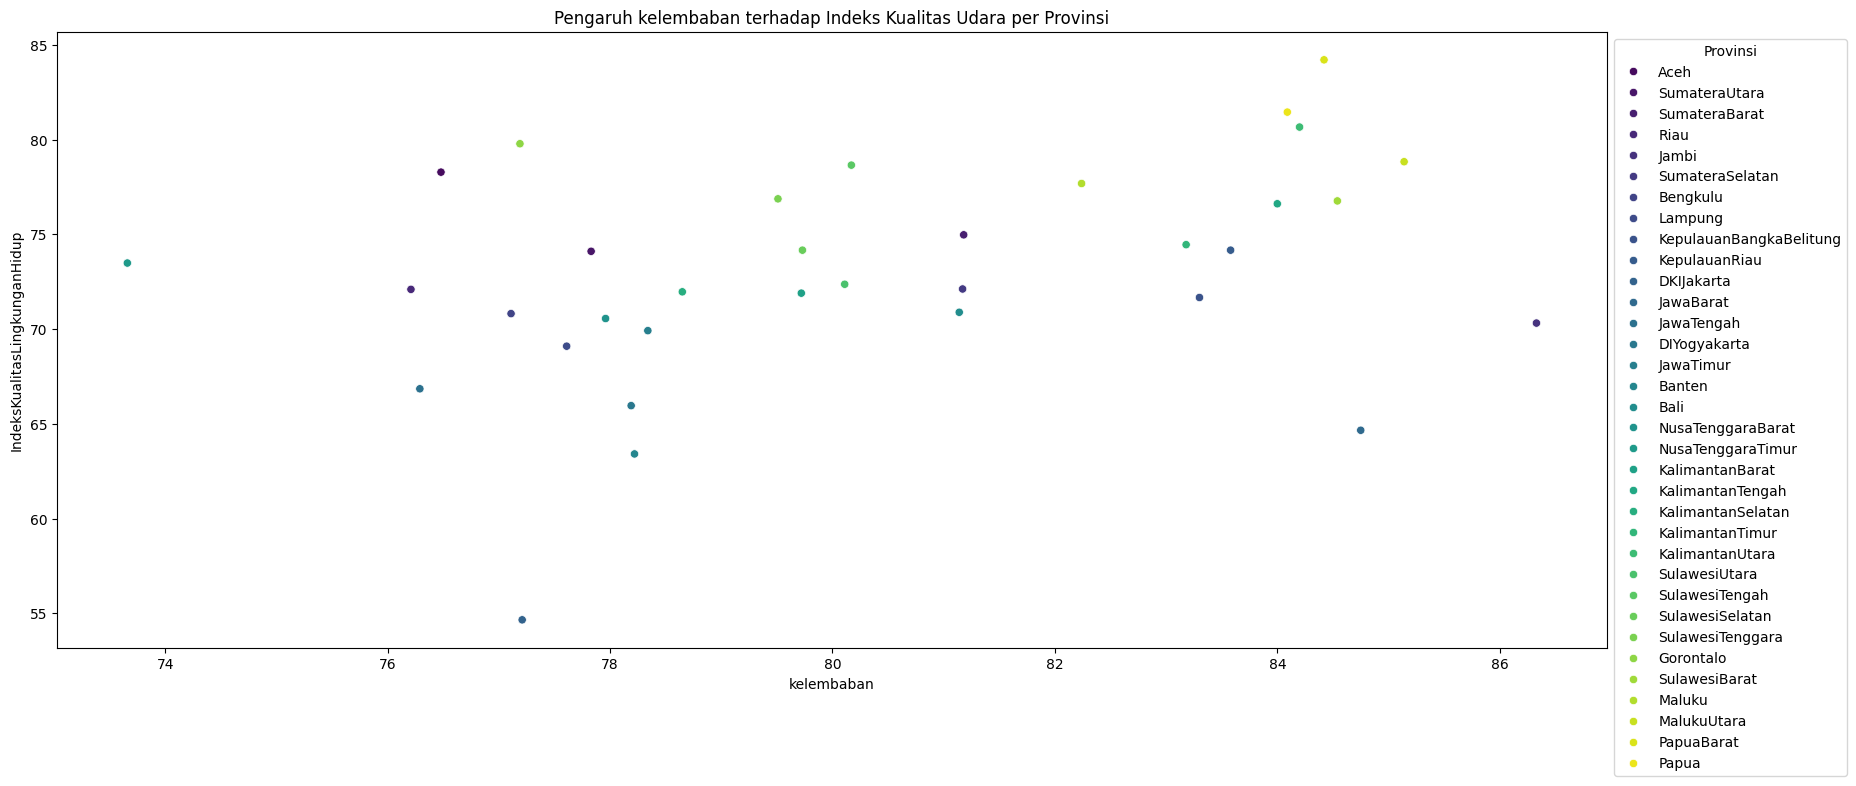

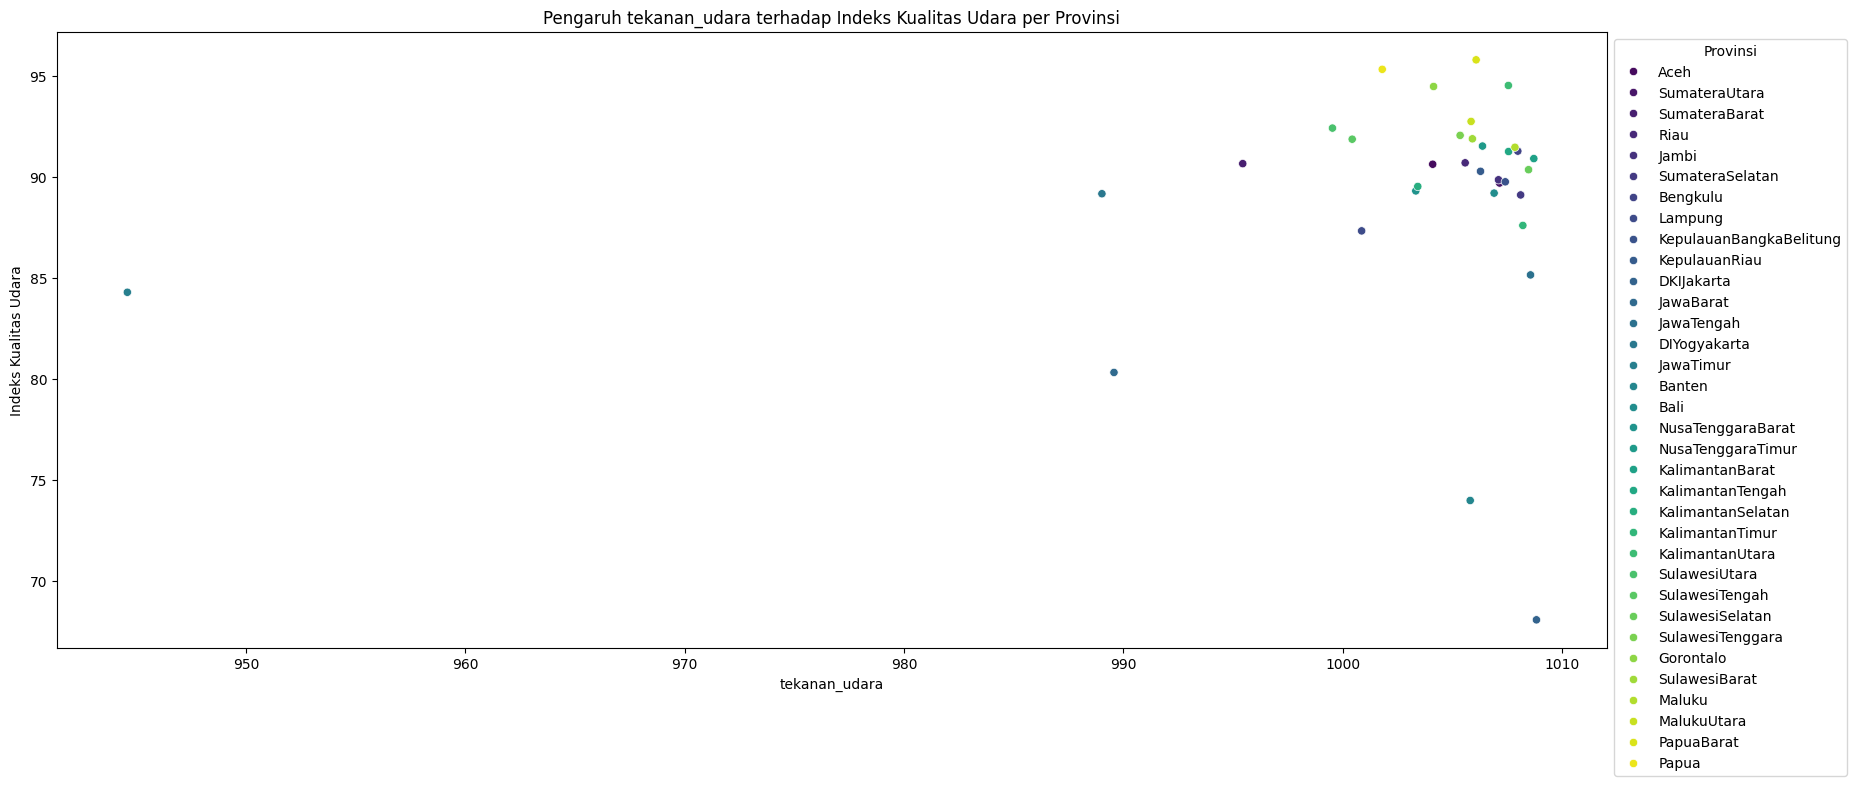

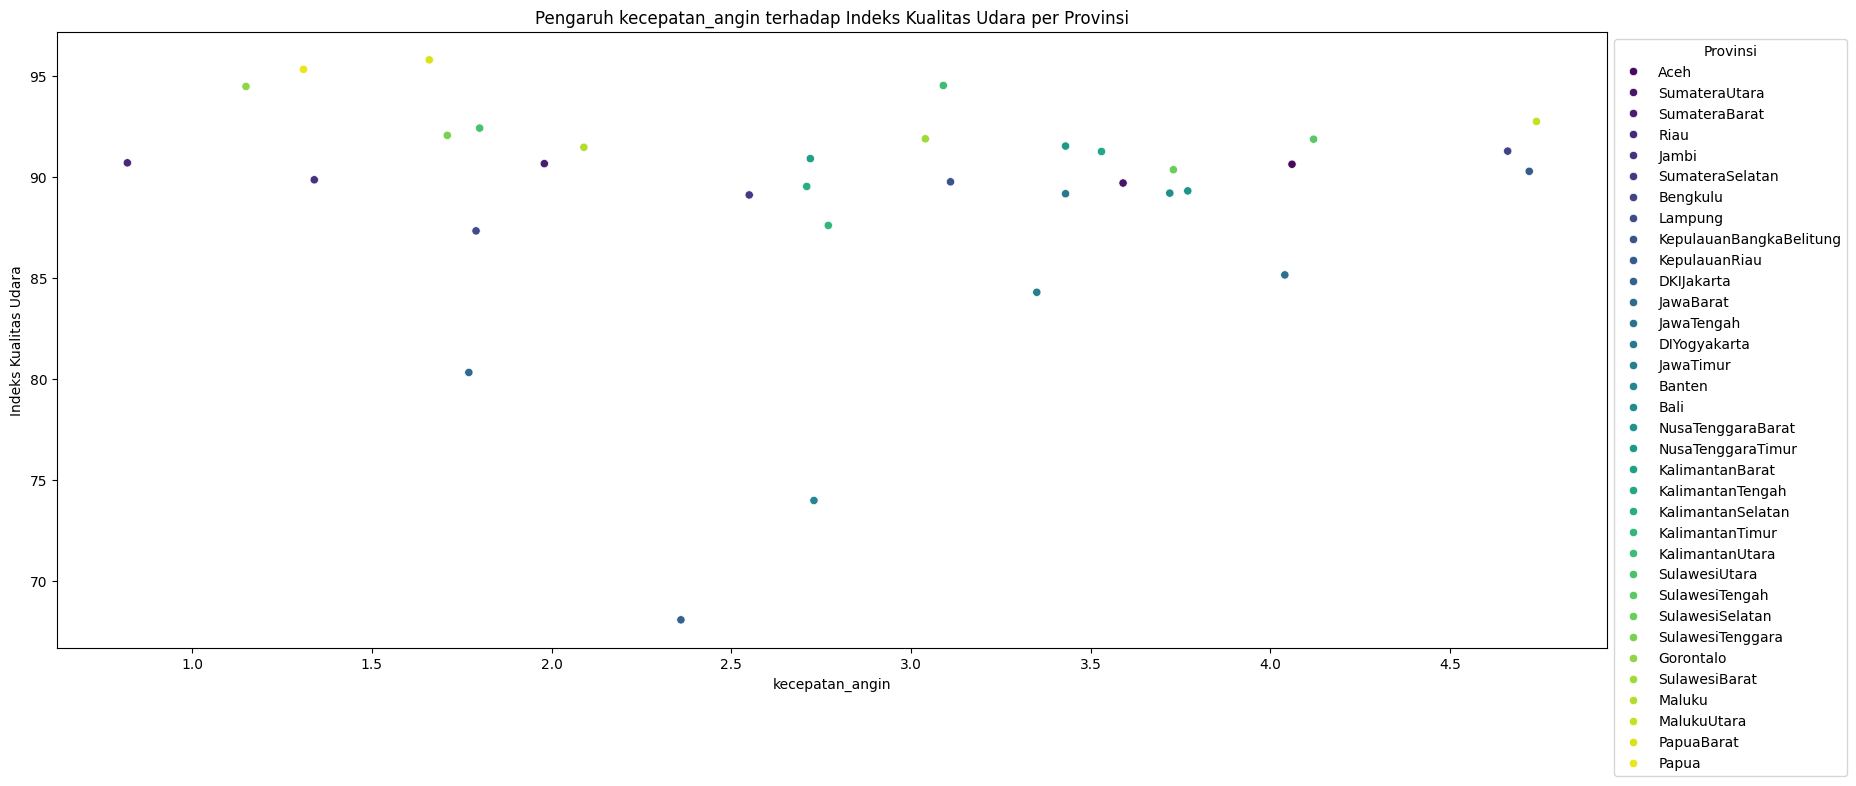

In [ ]:
# Variabel  IndeksKualitasLingkunganHidup apakah memperngaruhi Kualitas Udara
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitaslingkunganhidup', y='indekskualitasudara', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh IndeksKualitasLingkunganHidup terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('IndeksKualitasLingkunganHidup')
plt.ylabel('indekskualitasudara')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  kelembaban apakah memperngaruhi Kualitas Udara
plt.figure(figsize=(20, 8))
sns.scatterplot(x='kelembaban', y='indekskualitaslingkunganhidup', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh kelembaban terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('kelembaban')
plt.ylabel('IndeksKualitasLingkunganHidup')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  tekanan_udara apakah memperngaruhi Kualitas Udara
plt.figure(figsize=(20, 8))
sns.scatterplot(x='tekananudara', y='indekskualitasudara', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh tekanan_udara terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('tekanan_udara')
plt.ylabel('Indeks Kualitas Udara')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  kecepatan_angin apakah memperngaruhi Kualitas Udara
plt.figure(figsize=(20, 8))
sns.scatterplot(x='kecepatanangin', y='indekskualitasudara', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh kecepatan_angin terhadap Indeks Kualitas Udara per Provinsi')
plt.xlabel('kecepatan_angin')
plt.ylabel('Indeks Kualitas Udara')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

dapat dilihat bahwa variabel yang mempengaruhi kualitas udara yaitu variabel kealitas lingkungan hidup. yakni, kualitas lingkungan hidup sangat mempengaruhi kualitas udara. dimana dalam scatter tersebut memiliki huungan linier yang positif dengan membentuk titik-titik dari kiri bawah ke kanan atas.

PENCEMARAN AIR

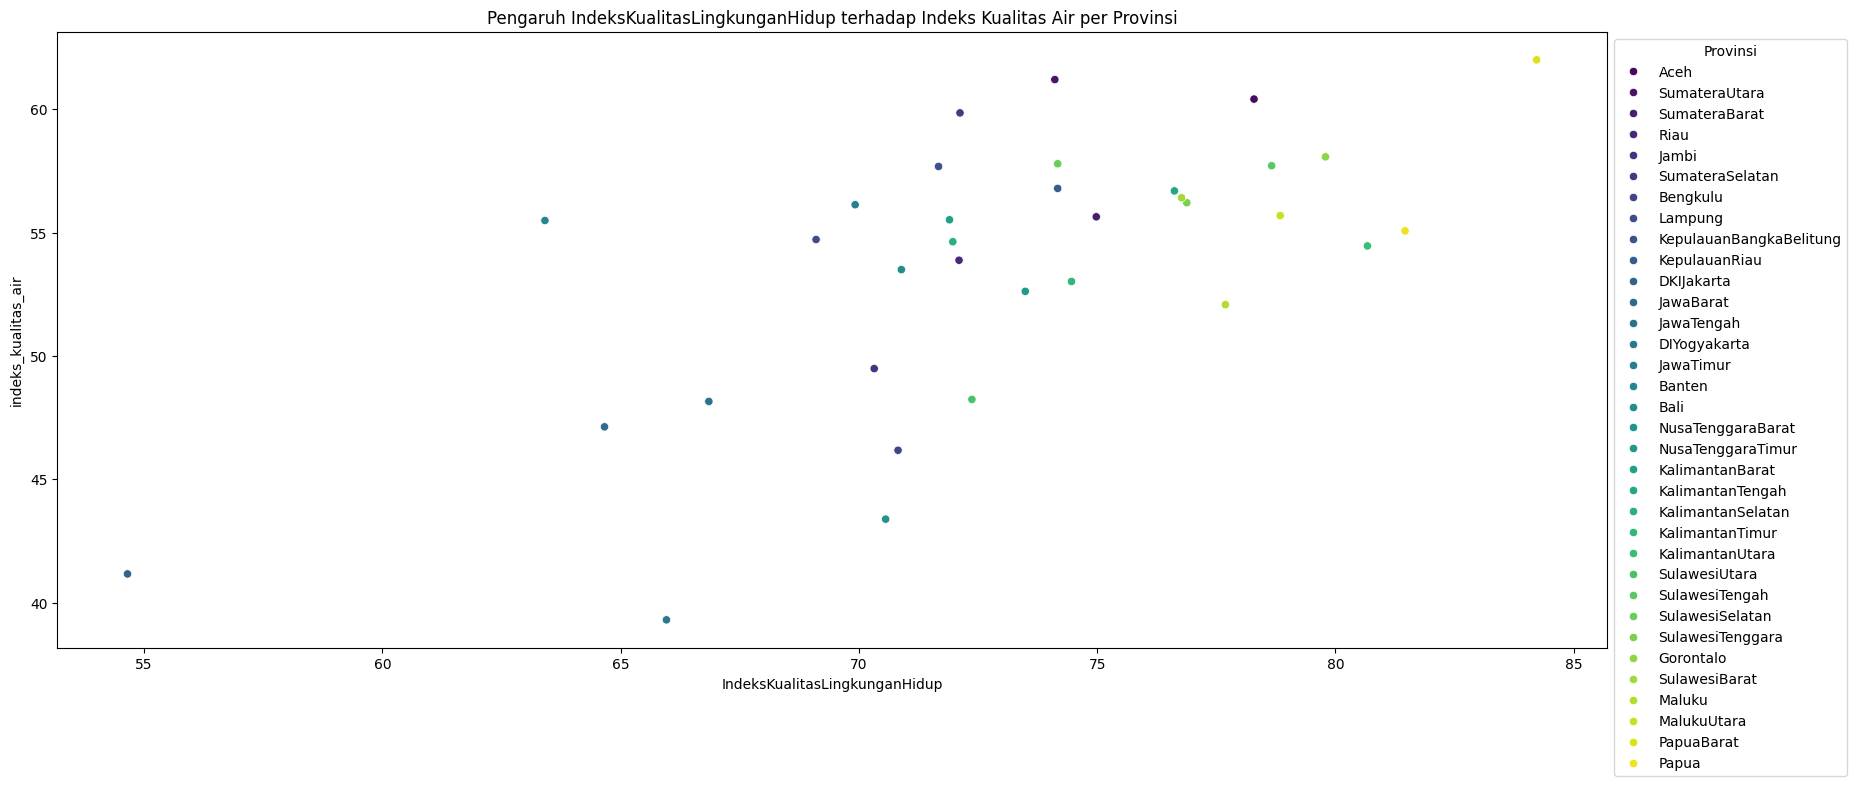

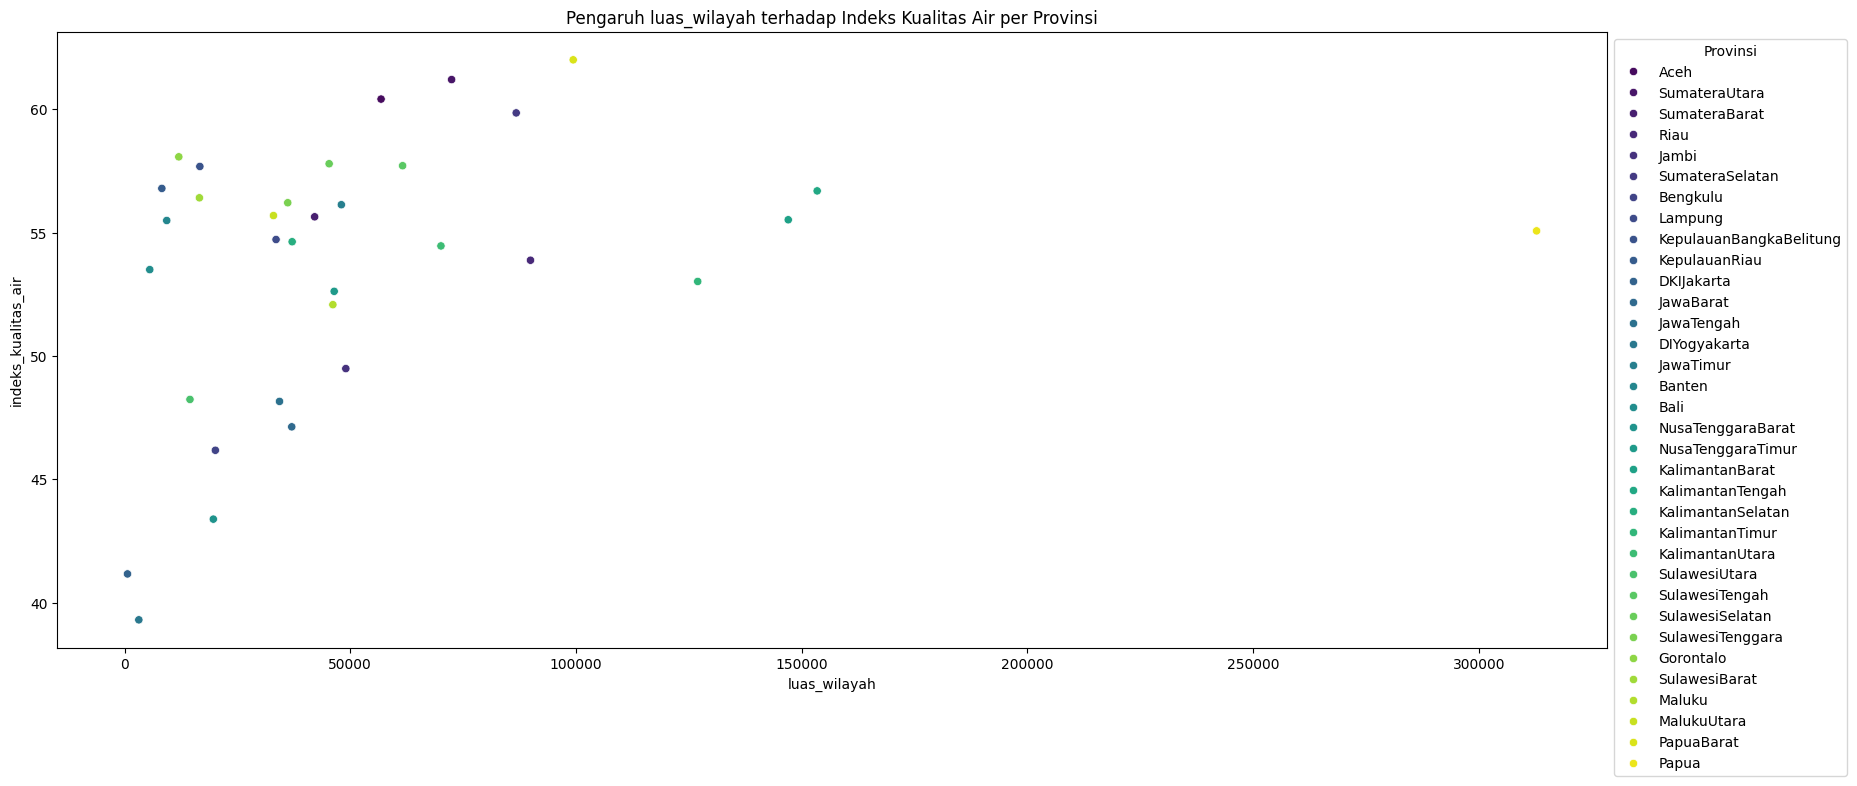

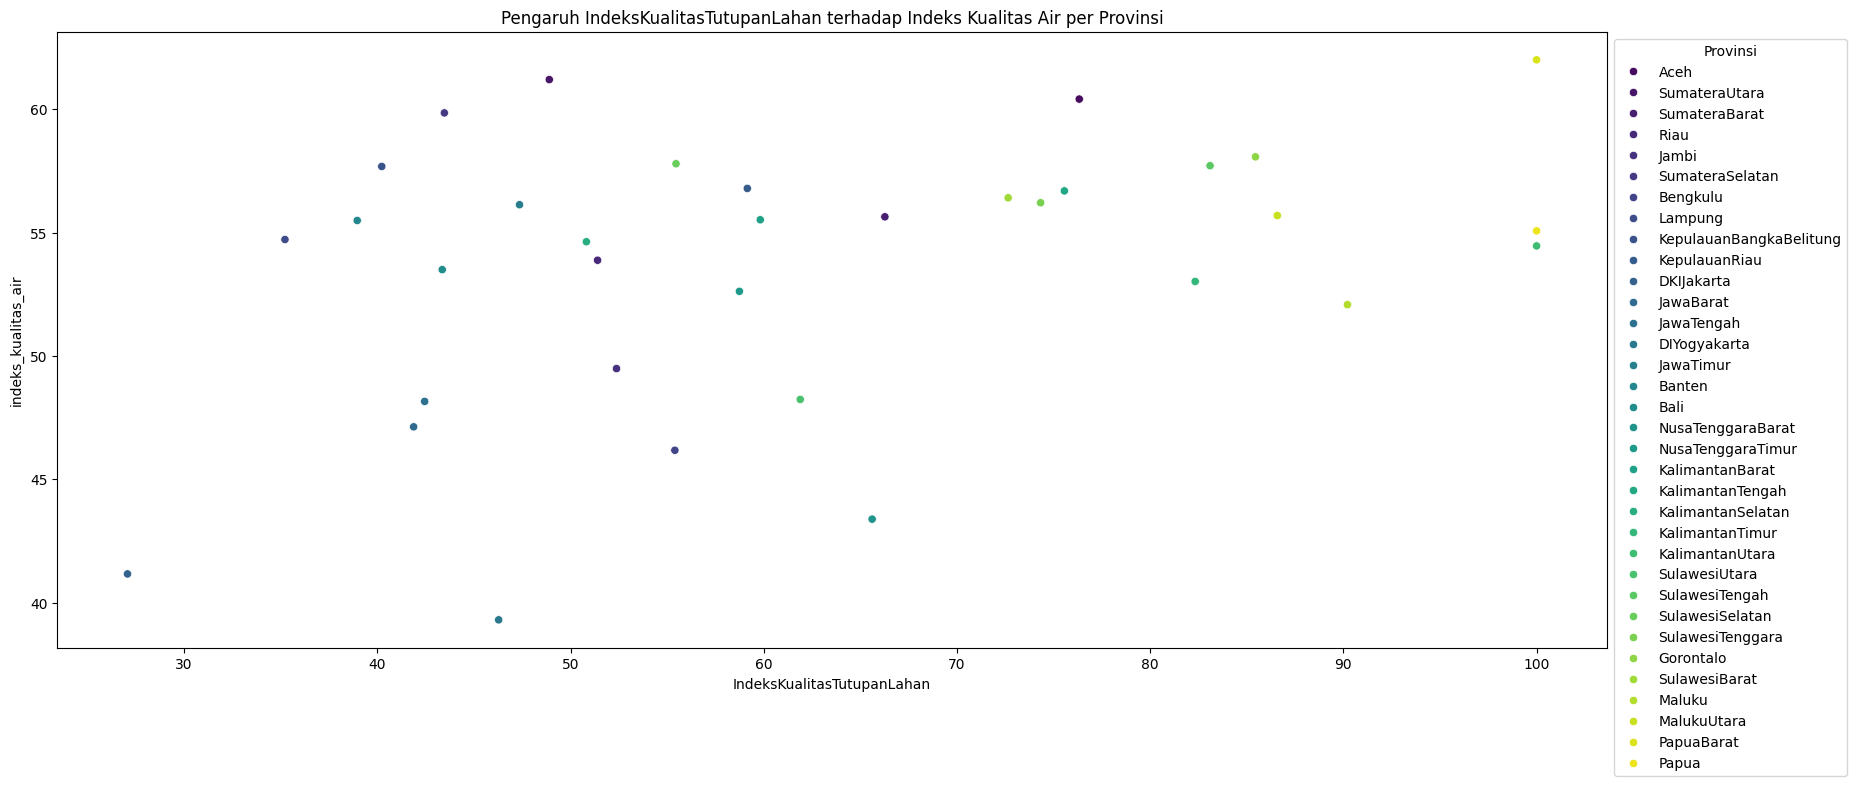

In [ ]:
# Variabel  IndeksKualitasLingkunganHidup apakah memperngaruhi Kualitas Air
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitaslingkunganhidup', y='indekskualitasair', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh IndeksKualitasLingkunganHidup terhadap Indeks Kualitas Air per Provinsi')
plt.xlabel('IndeksKualitasLingkunganHidup')
plt.ylabel('indeks_kualitas_air')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  luas_wilayah apakah memperngaruhi Kualitas Air
plt.figure(figsize=(20, 8))
sns.scatterplot(x='luaswilayah', y='indekskualitasair', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh luas_wilayah terhadap Indeks Kualitas Air per Provinsi')
plt.xlabel('luas_wilayah')
plt.ylabel('indeks_kualitas_air')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  luas_wilayah apakah memperngaruhi Kualitas Air
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitastutupanlahan', y='indekskualitasair', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh IndeksKualitasTutupanLahan terhadap Indeks Kualitas Air per Provinsi')
plt.xlabel('IndeksKualitasTutupanLahan')
plt.ylabel('indeks_kualitas_air')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')



Dapat dilihat bahwa pencemaran air dipengaruhi oleh kualitas lingkungan hidup dan luas wilayah, dimana kedua scatter plot tersebut menunjukan arah hubungan linier positif. dimana untuk kualitas lingkungan hidup yang semakin rendah maka indeks kualitas air juga menurun, begitupun dengan luas wilayah dan indeks kualitas tutupan lahan.

PENCEMARAN TANAH

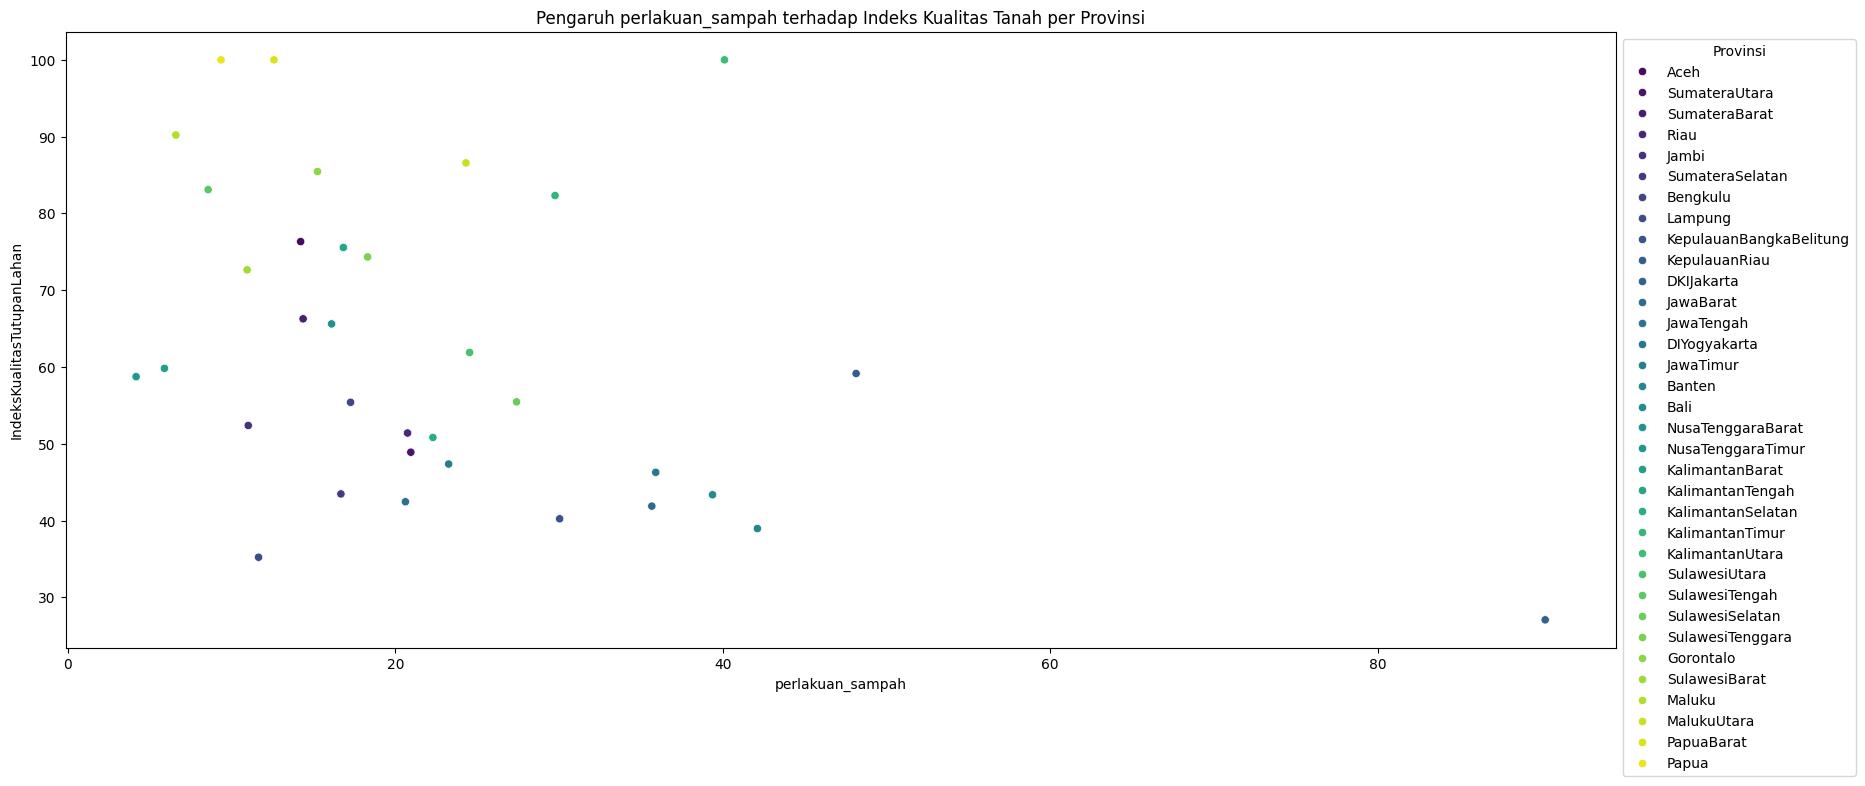

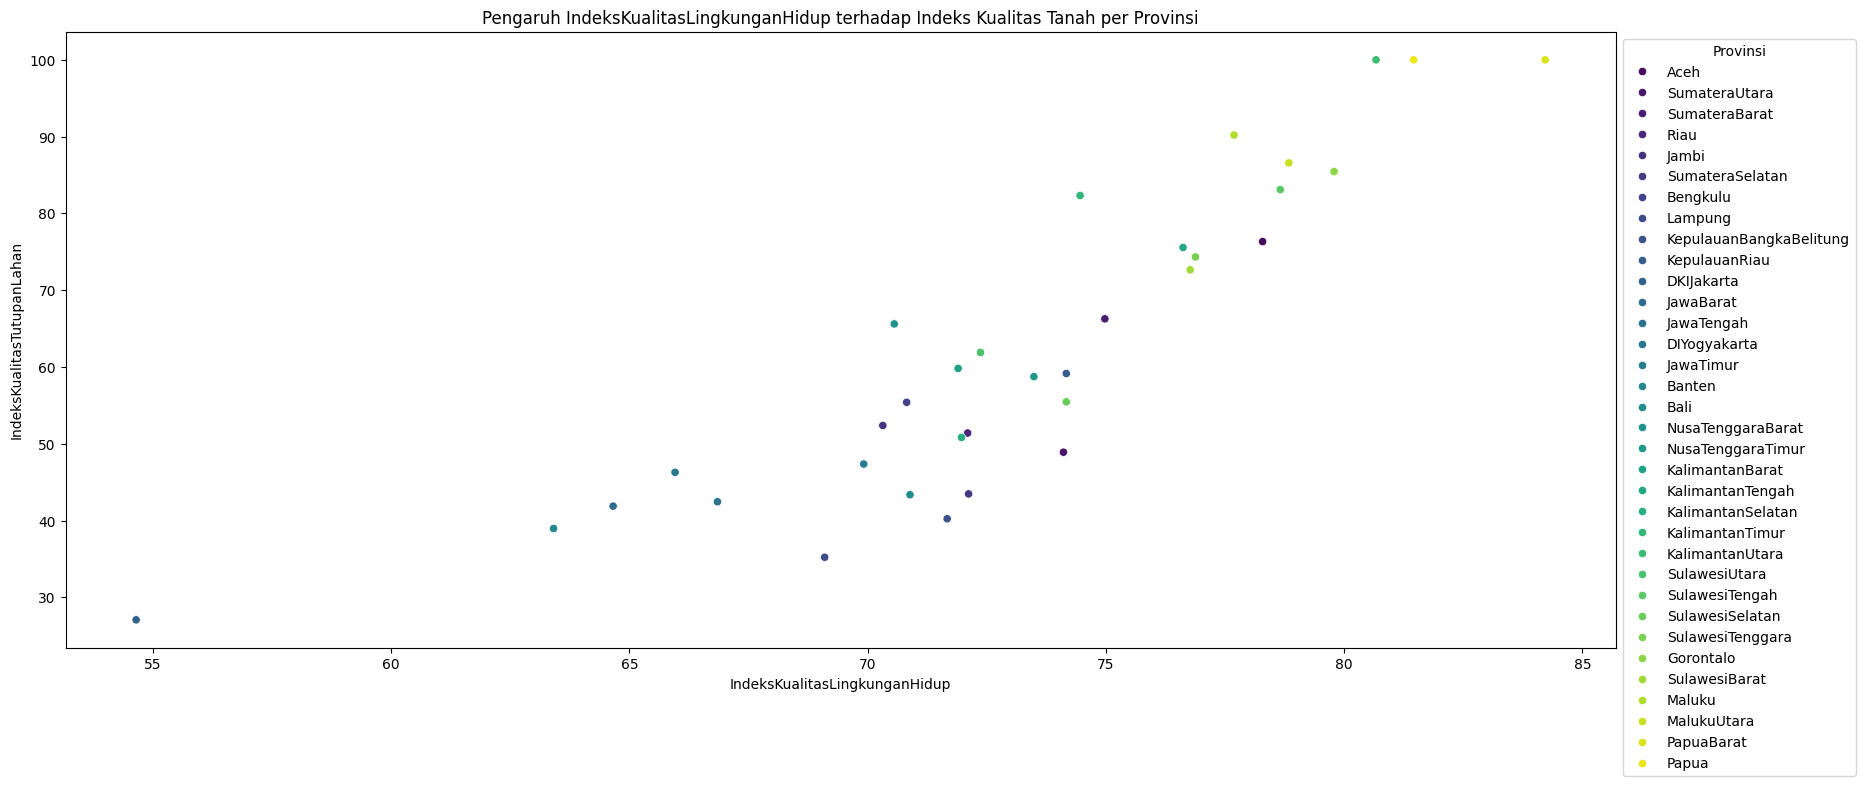

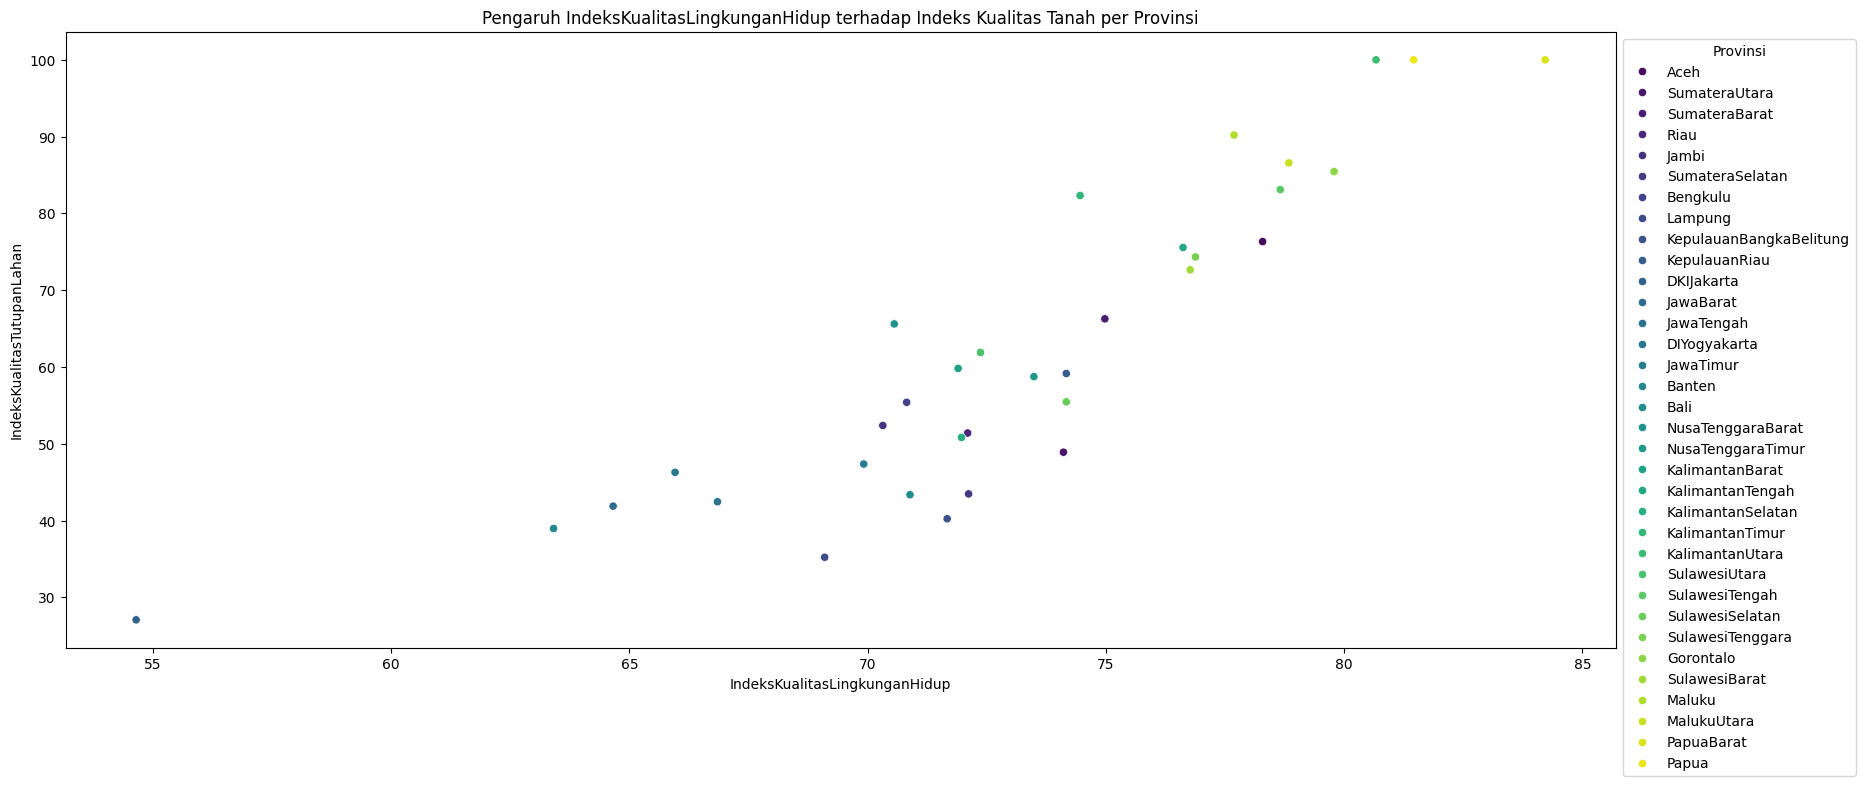

In [ ]:
# Variabel  perlakuan_sampah apakah memperngaruhi Kualitas Tanah
plt.figure(figsize=(20, 8))
sns.scatterplot(x='perlakuansampah', y='indekskualitastutupanlahan', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh perlakuan_sampah terhadap Indeks Kualitas Tanah per Provinsi')
plt.xlabel('perlakuan_sampah')
plt.ylabel('IndeksKualitasTutupanLahan')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  IndeksKualitasLingkunganHidup apakah memperngaruhi Kualitas Tanah
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitaslingkunganhidup', y='indekskualitastutupanlahan', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh IndeksKualitasLingkunganHidup terhadap Indeks Kualitas Tanah per Provinsi')
plt.xlabel('IndeksKualitasLingkunganHidup')
plt.ylabel('IndeksKualitasTutupanLahan')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')

# Variabel  IndeksKualitasLingkunganHidup apakah memperngaruhi Kualitas Tanah
plt.figure(figsize=(20, 8))
sns.scatterplot(x='indekskualitaslingkunganhidup', y='indekskualitastutupanlahan', data=df_combined_full, hue='provinsi', palette='viridis')
plt.title('Pengaruh IndeksKualitasLingkunganHidup terhadap Indeks Kualitas Tanah per Provinsi')
plt.xlabel('IndeksKualitasLingkunganHidup')
plt.ylabel('IndeksKualitasTutupanLahan')
plt.legend(title='Provinsi', bbox_to_anchor=(1, 1), loc='upper left')



In [ ]:
drop_column = ['jumlahcurahhujan(mm/tahun)', 'jumlahharihujan(hari)', 'penyinaranmatahari(jam)', 'kelembaban', 'tekananudara', 'kecepatanangin', 'jumlahpulau', 'indikatorph', 'indikatortds', 'indikatortss', 'indikatorsuhu', 'indikatordo', 'indikatorbod', 'indikatorcod', 'indikatorno3', 'indikatornh3', 'indikatorso4', 'indikatorfecalcoliform', 'indikatorcoliform', 'indekskualitasairlaut', 'jumlahproduksisampah', 'aksessanitasilayak']

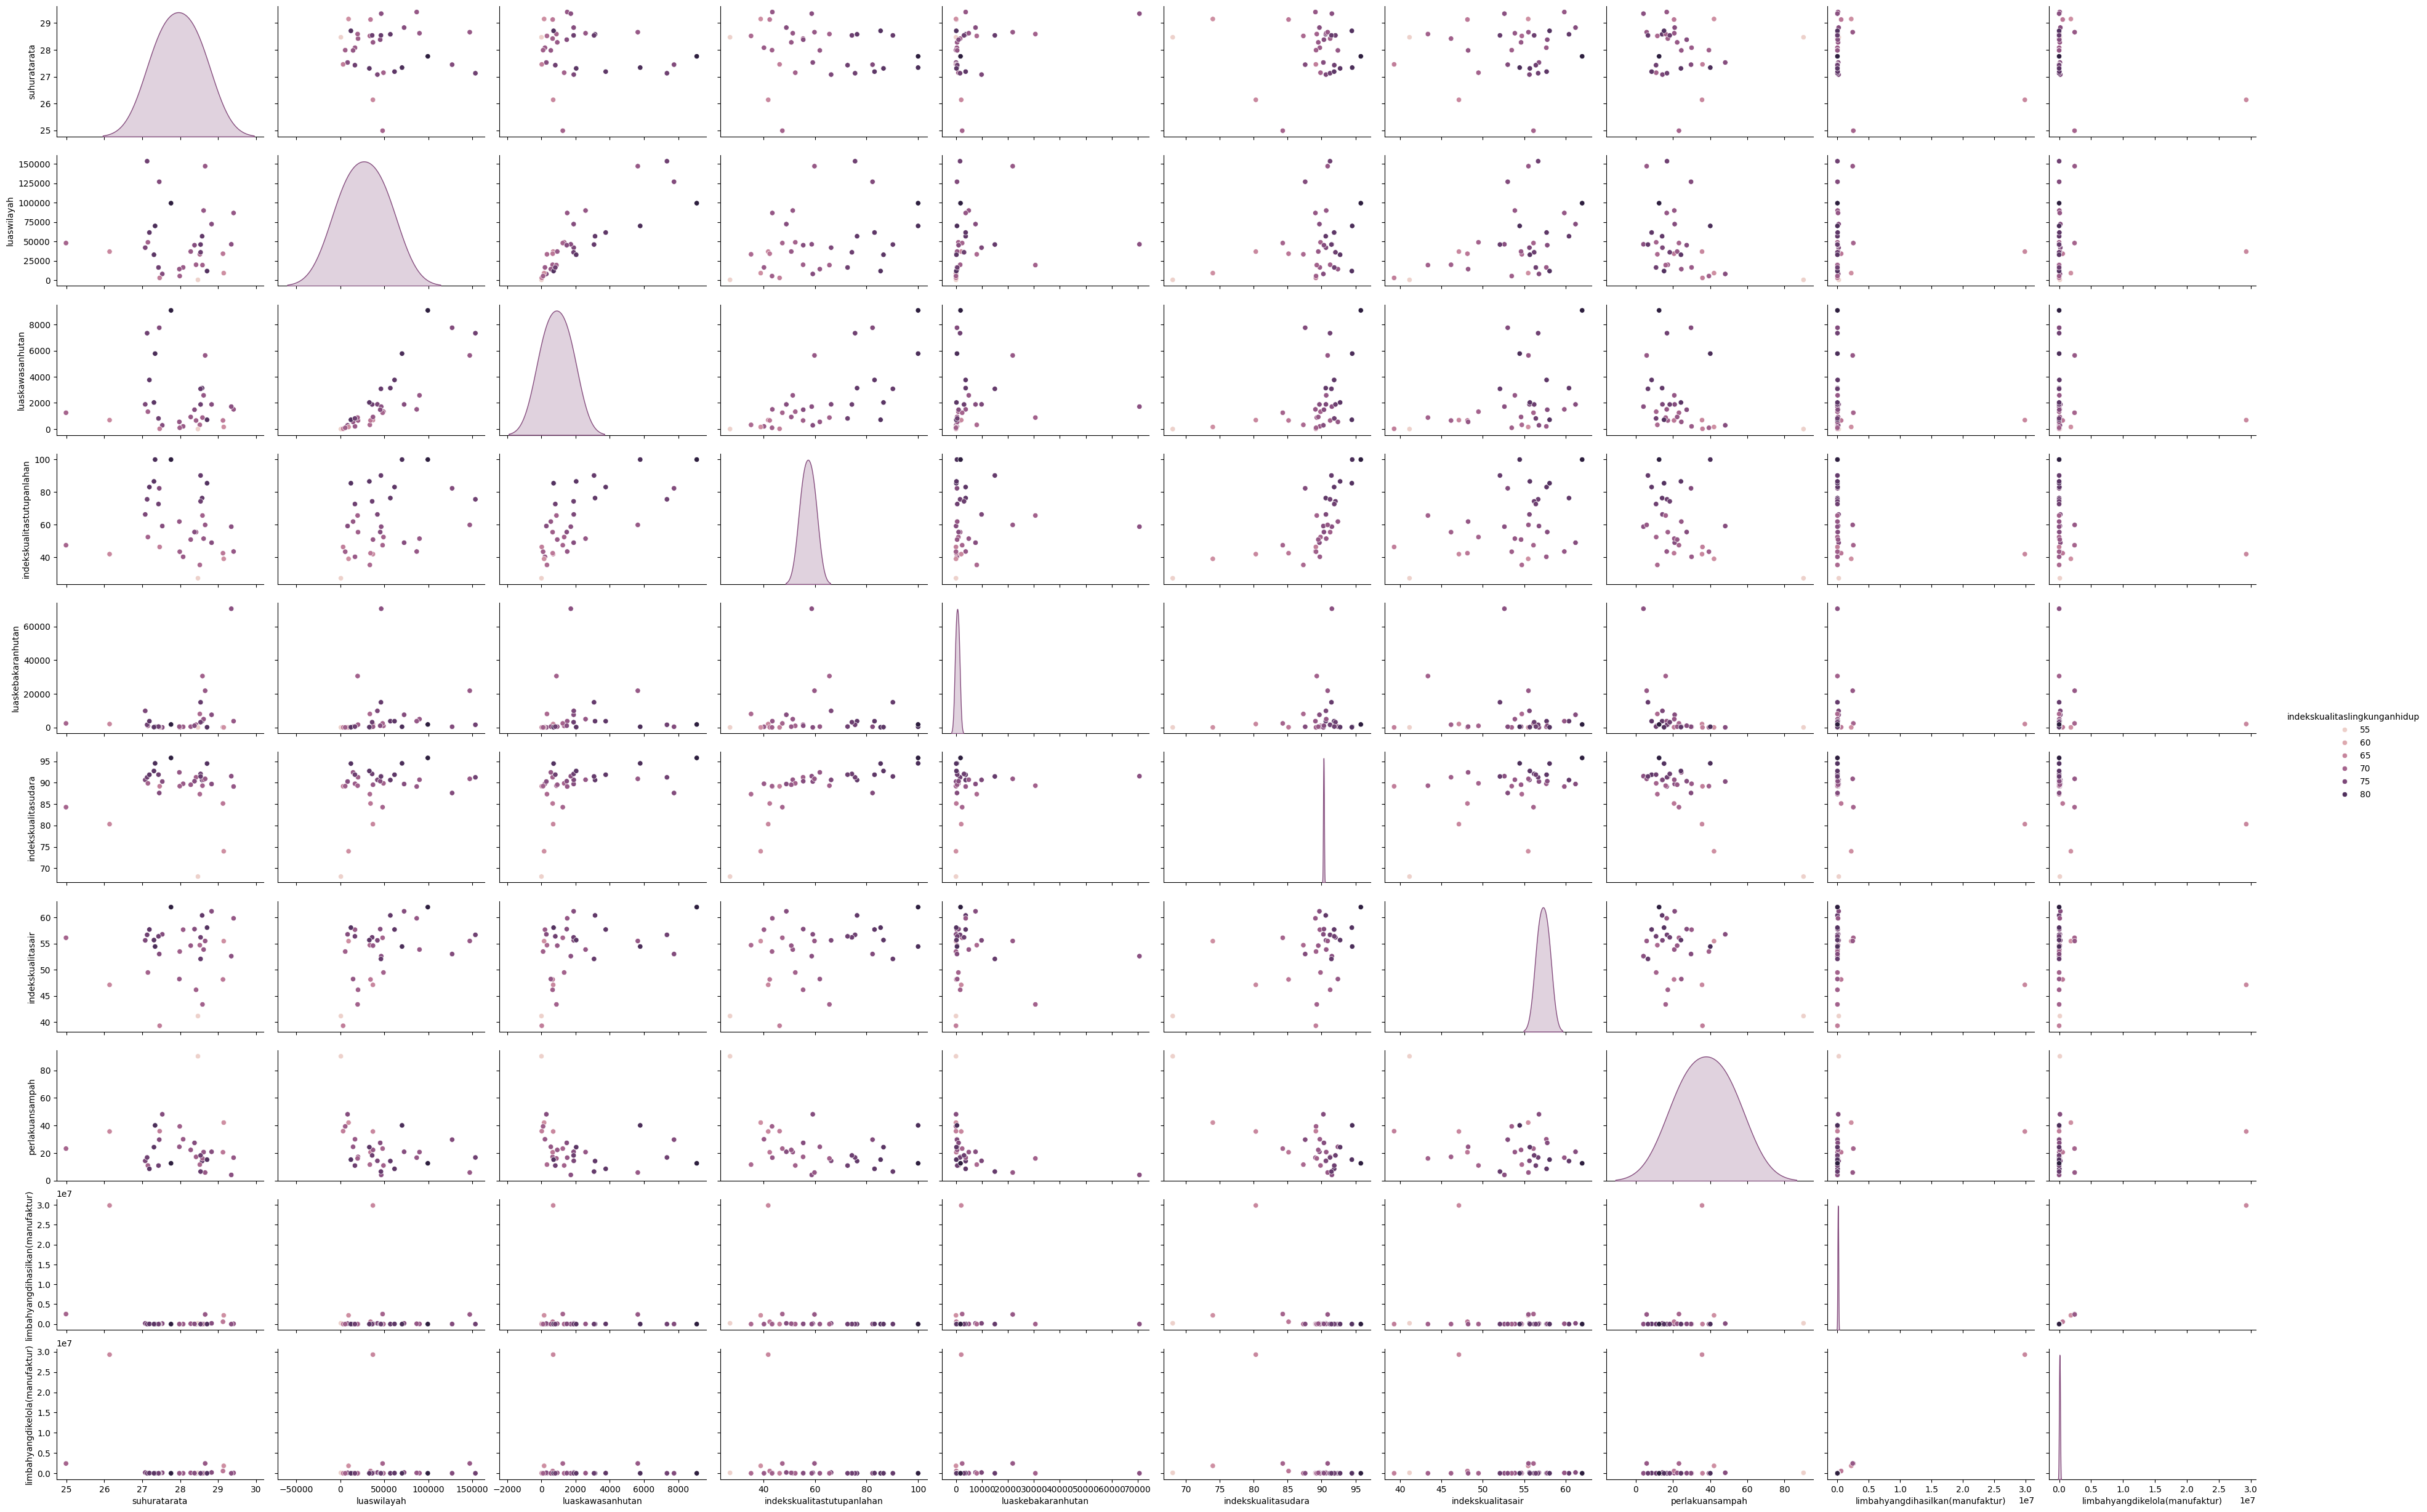

In [ ]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(df.drop(drop_column, axis=1), hue='indekskualitaslingkunganhidup', aspect=1.5)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = df_combined
# Hitung VIF untuk setiap kolom
vif = pd.DataFrame()
vif["variables"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

print(vif)


                           variables           VIF
0                       suhuratarata  4.494996e+04
1         jumlahcurahhujan(mm/tahun)  1.056825e+02
2              jumlahharihujan(hari)  5.354175e+02
3            penyinaranmatahari(jam)  1.491304e+03
4                         kelembaban  2.288204e+04
5                       tekananudara  2.683400e+05
6                     kecepatanangin  2.074458e+02
7                        luaswilayah  3.365818e+02
8                        jumlahpulau  1.094891e+01
9                   luaskawasanhutan  3.293404e+02
10        indekskualitastutupanlahan  1.959718e+05
11                luaskebakaranhutan  4.824406e+01
12               indekskualitasudara  4.032531e+06
13                       indikatorph  1.053915e+03
14                      indikatortds  2.092554e+01
15                      indikatortss  5.368599e+01
16                     indikatorsuhu  3.897593e+01
17                       indikatordo  2.483918e+02
18                      indikat

Variabel Inflasi Faktor (VIF) adalah metode untuk mengukur sejauh mana variabel independen dalam model regresi bergantung pada variabel lainnya. Dalam hal ini, nilai VIF yang tinggi (biasanya lebih dari 5) menunjukkan bahwa variabel tersebut memiliki korelasi tinggi dengan variabel lain dalam model, yang dapat menyebabkan masalah multikolinearitas.

Mari kita tinjau ulang variabel yang lebih dari 0.7 korelasinya

Indikator bod X indikator cod = 0.71

Indikator coliform X perlakuan sampah = 0.72

Indikator fecalcoliform X perlakuan sampah = 0.73

Indikator nh3 X indikator tts = 0.77

Index kualitas tutupan lahan X index kualitas lingkungan hidup = 0.88

Index kualitas udara X index kualitas lingkungan hidup = 0.88

Luas wilayah X luas kawasan hutan = 0.94

## Memilih Variabel Analisis


In [ ]:
# Menghitung korelasi
corr = df_combined_full[['indekskualitasudara', 'indekskualitaslingkunganhidup', 'indekskualitastutupanlahan']].corr()

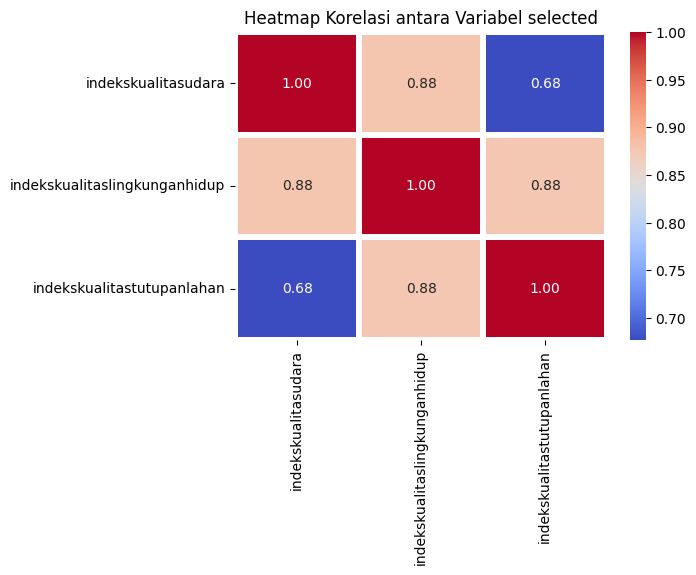

In [ ]:
# Membuat heatmap korelasi antara variabel
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=4)
plt.title("Heatmap Korelasi antara Variabel selected")
plt.show()

In [ ]:
# Men skala kan data
scaler = StandardScaler()
scaled = scaler.fit_transform(df_combined_full[['indekskualitasudara',
                                                'indekskualitaslingkunganhidup',
                                                'indekskualitastutupanlahan']])

## K-Means Modelling

<Figure size 1000x500 with 0 Axes>

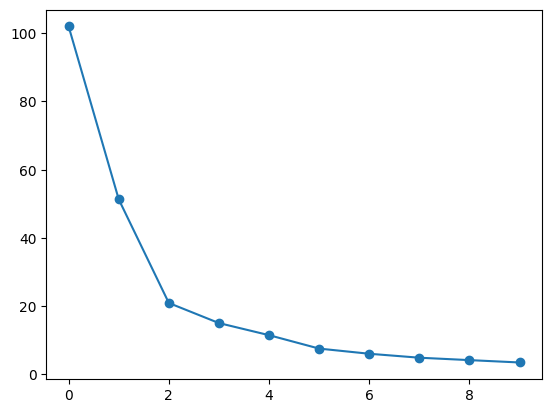

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Mengecek berapa nilai K-Means
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.plot(inertia, marker='o')
plt.figure(figsize=(10,5))

Rata-rata nilai silhouette: 0.5371261258191529


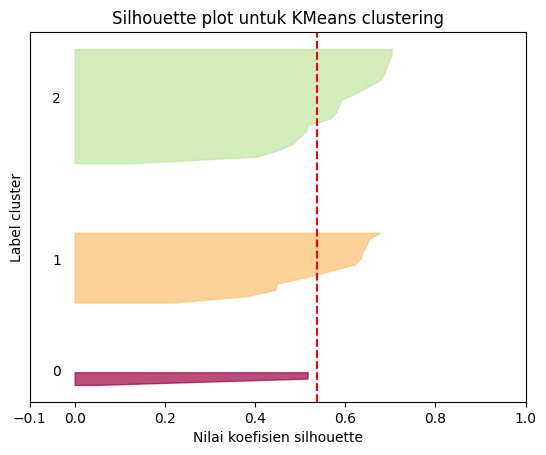

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Menggunakan 3 cluster
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
cluster_labels = kmeans.fit_predict(scaled)

# Menghitung nilai silhouette
silhouette_avg = silhouette_score(scaled, cluster_labels)
print("Rata-rata nilai silhouette:", silhouette_avg)

# Menghitung nilai silhouette untuk setiap sampel
sample_silhouette_values = silhouette_samples(scaled, cluster_labels)

# Visualisasi nilai silhouette
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Menggabungkan nilai silhouette untuk sampel yang termasuk dalam cluster i dan mengurutkannya
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Menandai plot silhouette dengan nomor cluster di tengahnya
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Menghitung y_lower baru untuk plot berikutnya
    y_lower = y_upper + 10

ax.set_title("Silhouette plot untuk KMeans clustering")
ax.set_xlabel("Nilai koefisien silhouette")
ax.set_ylabel("Label cluster")

# Garis vertikal untuk rata-rata nilai silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Menghapus label sumbu y
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()


Silhouette score for K=2: 0.46830801438314973
Silhouette score for K=3: 0.5371261258191529
Silhouette score for K=4: 0.4649935038543299
Silhouette score for K=5: 0.4090296181210648
Silhouette score for K=6: 0.39929705882354044
Silhouette score for K=7: 0.3459722749230937


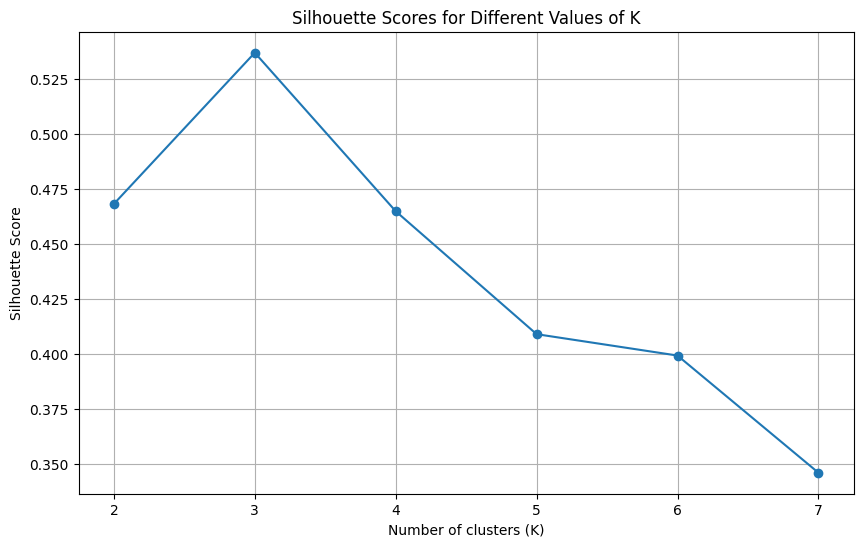

In [ ]:
k_values = range(2, 8)

# List to store silhouette scores
silhouette_scores = []

# Perform clustering and silhouette analysis for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(scaled)
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette score for K={k}: {silhouette_avg}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
selected = df_combined_full[['provinsi', 'indekskualitasudara', 'indekskualitaslingkunganhidup', 'indekskualitastutupanlahan']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
selected['cluster'] = (kmeans.labels_+1)
selected.tail()

provinsi  indekskualitasudara  indekskualitaslingkunganhidup  \
29  SulawesiBarat                91.88                          76.77   
30         Maluku                91.46                          77.69   
31    MalukuUtara                92.74                          78.84   
32     PapuaBarat                95.79                          84.22   
33          Papua                95.32                          81.46   

    indekskualitastutupanlahan  cluster  
29                       72.65        1  
30                       90.21        1  
31                       86.58        1  
32                      100.00        1  
33                      100.00        1

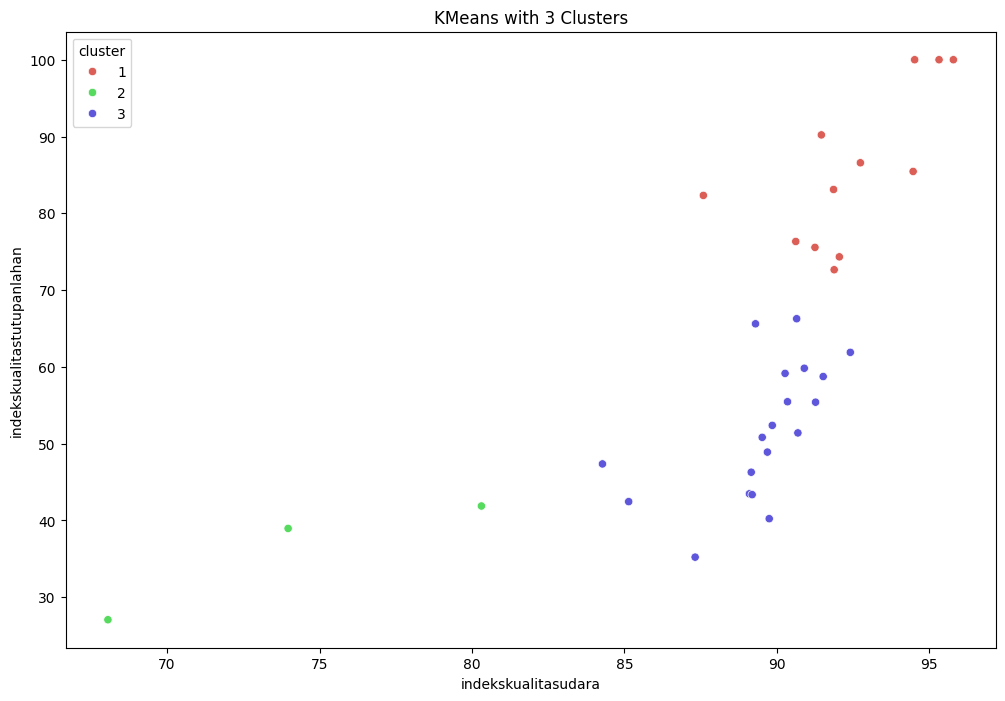

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=selected['indekskualitasudara'], y=selected['indekskualitastutupanlahan'], hue=selected['cluster'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [ ]:
selected.groupby('cluster')[['indekskualitasudara','indekskualitaslingkunganhidup', 'indekskualitastutupanlahan']].mean()

indekskualitasudara  indekskualitaslingkunganhidup  \
cluster                                                       
1                  92.462500                      78.695833   
2                  74.113333                      60.906667   
3                  89.492632                      71.445789   

         indekskualitastutupanlahan  
cluster                              
1                         85.545000  
2                         35.970000  
3                         51.800526

Hasil: \
Cluster 1: indeks kualitas udara(baik), indeks kualitas lingkungan hidup (baik), indeks kualitas tutupan lahan(baik) \
Cluster 2: indeks kualitas udara(buruk), indeks kualitas lingkungan hidup(buruk), indeks kualitas tutupan lahan(buruk) \
Cluster 3: indeks kualitas udara(sedang), indeks kualitas lingkungan hidup (sedang), indeks kualitas tutupan lahan(sedang) \

In [ ]:
def func(row):
    if row['cluster']==1:
        return 'Zona Hijau'
    elif row['cluster']==2:
        return 'Zona Merah'
    else:
        return "Zona Kuning"

In [ ]:
selected['conditions'] = selected.apply(func, axis=1)
selected

provinsi  indekskualitasudara  \
0                      Aceh                90.62   
1             SumateraUtara                89.69   
2             SumateraBarat                90.65   
3                      Riau                90.69   
4                     Jambi                89.85   
5           SumateraSelatan                89.10   
6                  Bengkulu                91.27   
7                   Lampung                87.32   
8   KepulauanBangkaBelitung                89.75   
9             KepulauanRiau                90.27   
10               DKIJakarta                68.06   
11                JawaBarat                80.31   
12               JawaTengah                85.14   
13             DIYogyakarta                89.16   
14                JawaTimur                84.28   
15                   Banten                73.97   
16                     Bali                89.19   
17        NusaTenggaraBarat                89.30   
18        NusaTenggaraTimur                91.52   
19          KalimantanBarat                90.90   
20         KalimantanTengah                91.25   
21        KalimantanSelatan                89.52   
22          KalimantanTimur                87.59   
23          KalimantanUtara                94.52   
24            SulawesiUtara                92.41   
25           SulawesiTengah                91.86   
26          SulawesiSelatan                90.35   
27         SulawesiTenggara                92.05   
28                Gorontalo                94.47   
29            SulawesiBarat                91.88   
30                   Maluku                91.46   
31              MalukuUtara                92.74   
32               PapuaBarat                95.79   
33                    Papua                95.32   

    indekskualitaslingkunganhidup  indekskualitastutupanlahan  cluster  \
0                           78.29                       76.33        1   
1                           74.11                       48.90        3   
2                           74.98                       66.27        3   
3                           72.10                       51.40        3   
4                           70.32                       52.38        3   
5                           72.12                       43.47        3   
6                           70.82                       55.40        3   
7                           69.10                       35.22        3   
8                           71.67                       40.23        3   
9                           74.17                       59.15        3   
10                          54.65                       27.07        2   
11                          64.66                       41.88        2   
12                          66.85                       42.45        3   
13                          65.96                       46.28        3   
14                          69.92                       47.36        3   
15                          63.41                       38.96        2   
16                          70.89                       43.36        3   
17                          70.56                       65.61        3   
18                          73.49                       58.74        3   
19                          71.90                       59.82        3   
20                          76.62                       75.56        1   
21                          71.97                       50.82        3   
22                          74.46                       82.33        1   
23                          80.67                      100.00        1   
24                          72.37                       61.89        3   
25                          78.66                       83.10        1   
26                          74.17                       55.46        3   
27                          76.88                       74.33        1   
28                          79.79                   

In [ ]:
# Menghitung jumlah data dalam setiap kondisi (klaster)
results = selected['conditions'].value_counts()

# Menghitung persentase masing-masing klaster
total_data = results.sum()
percentages = (results / total_data) * 100

# Menampilkan hasil
results_with_percentages = pd.concat([results, percentages], axis=1)
results_with_percentages.columns = ['jumlah Data', 'persentase']
results_with_percentages


jumlah Data  persentase
conditions                          
Zona Kuning           19   55.882353
Zona Hijau            12   35.294118
Zona Merah             3    8.823529

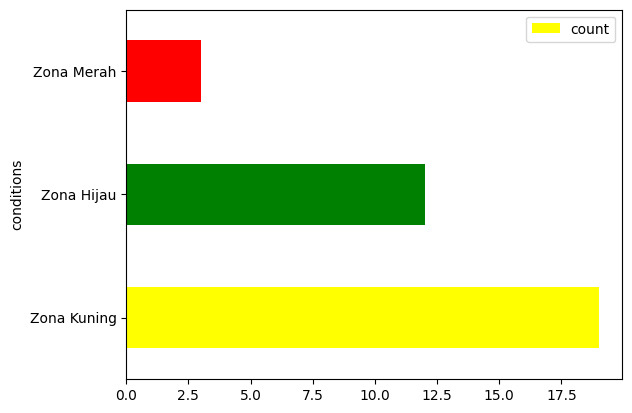

In [ ]:
colors = ['yellow', 'green', 'red']
ax = results.plot(kind='barh', color=colors, legend=False)
ax.legend()

In [ ]:
cluster = selected['cluster']
conditions = selected['conditions']
data_new = pd.concat([df_combined_full, cluster, conditions], axis=1)

In [ ]:
data_new

provinsi  suhuratarata  jumlahcurahhujan(mm/tahun)  \
0                      Aceh         28.58                      1834.1   
1             SumateraUtara         28.83                      3269.5   
2             SumateraBarat         27.08                      4950.5   
3                      Riau         28.62                      3231.1   
4                     Jambi         27.15                      3265.6   
5           SumateraSelatan         29.41                      3250.2   
6                  Bengkulu         28.42                      4518.5   
7                   Lampung         28.52                      2099.1   
8   KepulauanBangkaBelitung         28.08                      3026.7   
9             KepulauanRiau         27.53                      2590.6   
10               DKIJakarta         28.47                      2136.3   
11                JawaBarat         26.14                      3505.4   
12               JawaTengah         29.13                      2643.9   
13             DIYogyakarta         27.46                      3161.2   
14                JawaTimur         24.99                      3059.7   
15                   Banten         29.15                      2877.2   
16                     Bali         27.99                      2834.4   
17        NusaTenggaraBarat         28.59                      2649.9   
18        NusaTenggaraTimur         29.35                      2183.0   
19          KalimantanBarat         28.66                      3040.6   
20         KalimantanTengah         27.13                      3259.1   
21        KalimantanSelatan         28.28                      2738.1   
22          KalimantanTimur         27.45                      3313.7   
23          KalimantanUtara         27.34                      2065.3   
24            SulawesiUtara         27.98                      3529.8   
25           SulawesiTengah         27.19                       879.4   
26          SulawesiSelatan         28.38                      4650.9   
27         SulawesiTenggara         28.54                      2695.4   
28                Gorontalo         28.71                      2082.8   
29            SulawesiBarat         27.43                      2395.8   
30                   Maluku         28.54                      3766.0   
31              MalukuUtara         27.31                      2913.9   
32               PapuaBarat         27.76                      1549.0   
33                    Papua         27.95                      2576.3   

    jumlahharihujan(hari)  penyinaranmatahari(jam)  kelembaban  tekananudara  \
0                   162.0                     5.10       76.48       1004.10   
1                   200.0                     4.50       77.83       1007.15   
2                   223.0                     4.51       81.18        995.44   
3                   168.0                     4.52       76.21       1005.58   
4                   174.0                     4.21       86.33       1007.10   
5                   219.0                     4.07       81.17       1008.11   
6                   201.0                     5.95       77.11       1007.98   
7                   162.0                     4.86       77.61       1000.86   
8                   234.0                     3.74       83.30       1007.41   
9                   204.0                     4.51       83.58       1006.28   
10                  158.0                     3.85       77.21       1008.83   
11                  239.0                     4.92       84.75        989.57   
12                  188.0                     6.02       76.29       1008.56   
13                  214.0                     4.55       78.19        989.02   
14                  211.0                     5.50       78.34        944.59   
15                  201.0                     4.21       78.22       1005.81   
16                  200.0                     5.92       81.14       1006.90   
17                  168

In [ ]:
df.to_csv('df_combined_full.csv', index=False)